# Import Libraries & Dataset

In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [2]:
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
# for filter warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [5]:
# import requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [6]:
# import bank_personal_loan dataset
data = pd.read_csv('bank_loan.csv')
df = pd.DataFrame(data)
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91108       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# Overview of Dataset

In [7]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


# Cleaning Dataset

In [9]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

count      mean      std     min       25%      50%  \
ID                  5000.0   2500.50  1443.52     1.0   1250.75   2500.5   
Age                 5000.0     45.34    11.46    23.0     35.00     45.0   
Experience          5000.0     20.10    11.47    -3.0     10.00     20.0   
Income              5000.0     73.77    46.03     8.0     39.00     64.0   
ZIP Code            5000.0  93152.50  2121.85  9307.0  91911.00  93437.0   
Family              5000.0      2.40     1.15     1.0      1.00      2.0   
CCAvg               5000.0      1.94     1.75     0.0      0.70      1.5   
Education           5000.0      1.88     0.84     1.0      1.00      2.0   
Mortgage            5000.0     56.50   101.71     0.0      0.00      0.0   
Personal Loan       5000.0      0.10     0.29     0.0      0.00      0.0   
Securities Account  5000.0      0.10     0.31     0.0      0.00      0.0   
CD Account          5000.0      0.06     0.24     0.0      0.00      0.0   
Online              5000.0      0.60     0.49     0.0      0.00      1.0   
CreditCard          5000.0      0.29     0.46     0.0      0.00      0.0   

                         75%      max  
ID                   3750.25   5000.0  
Age                    55.00     67.0  
Experience             30.00     43.0  
Income                 98.00    224.0  
ZIP Code            94608.00  96651.0  
Family                  3.00      4.0  
CCAvg                   2.50     10.0  
Education               3.00      3.0  
Mortgage              101.00    635.0  
Personal Loan           0.00      1.0  
Securities Account      0.00      1.0  
CD Account              0.00      1.0  
Online                  1.00      1.0  
CreditCard              1.00      1.0

In [12]:
# find negative values in Experience columns
df[df['Experience'] < 0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

In [13]:
# convert above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [14]:
# check missing values
df.isna().sum().to_frame().T

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0         0       0      0          0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0

In [15]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 468 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [16]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities Account:
Securities Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD Account:
CD Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [17]:
# now check duplicated data
df.duplicated().sum()

0

In [18]:
# drop ID and ZIP Code columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

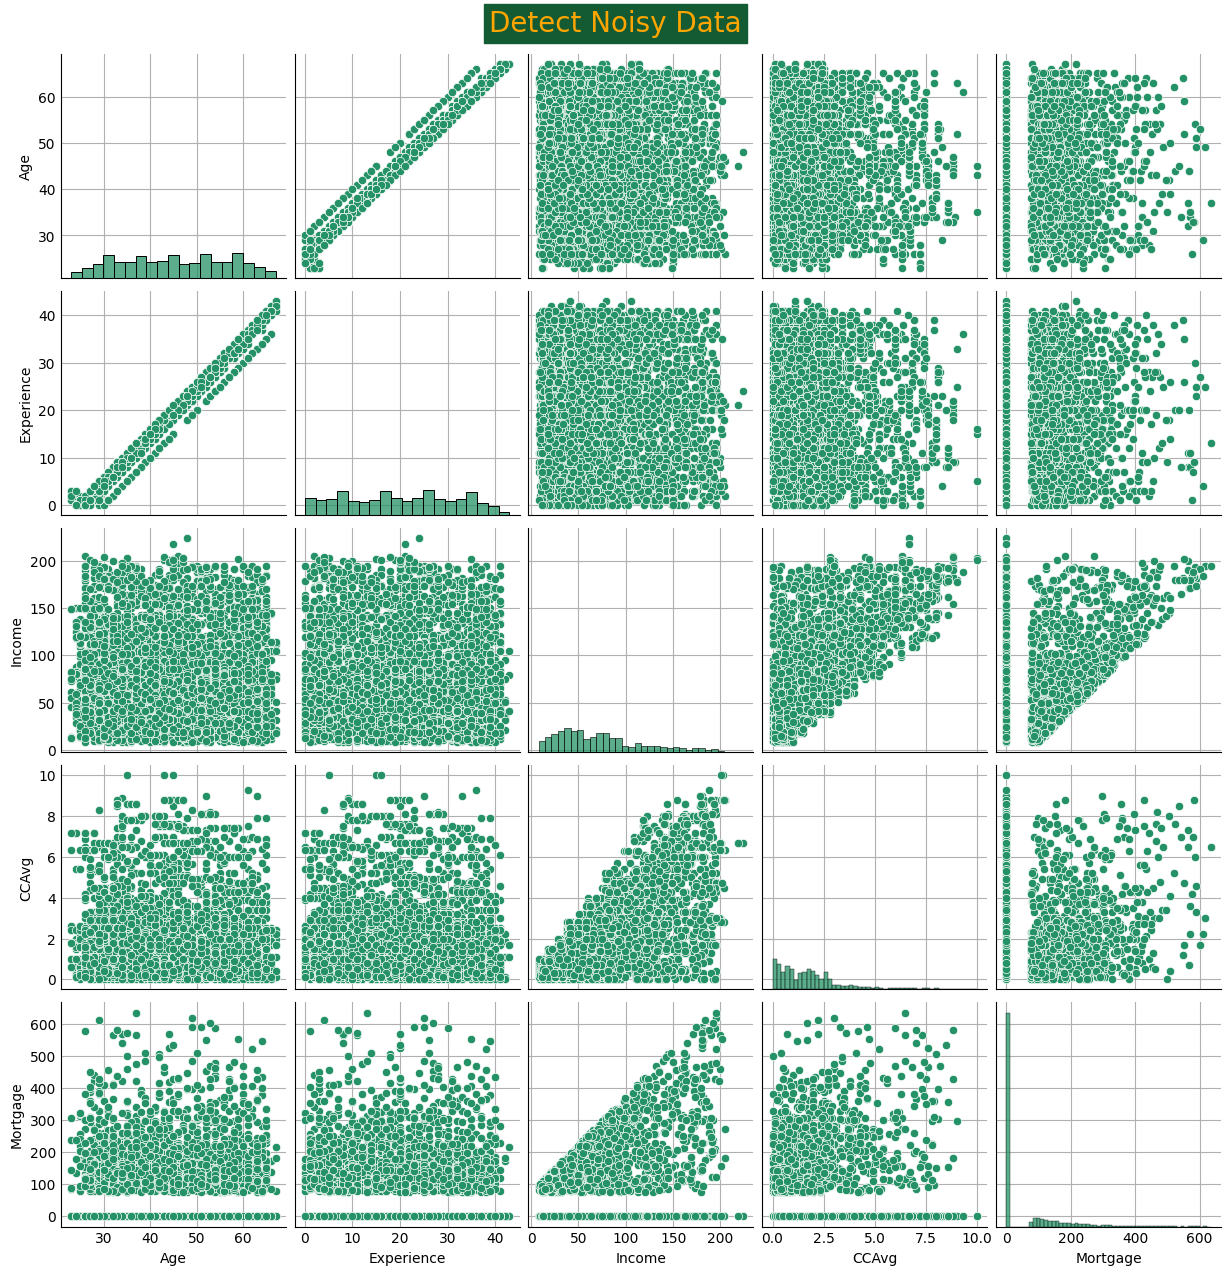

In [19]:
# check noisy data
%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)
plt.show()

In [20]:
# convert annual income to monthly with divide by 12
df['Income'] = round(df['Income']/12, 2)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

# Exploratory Data Analysis (EDA)

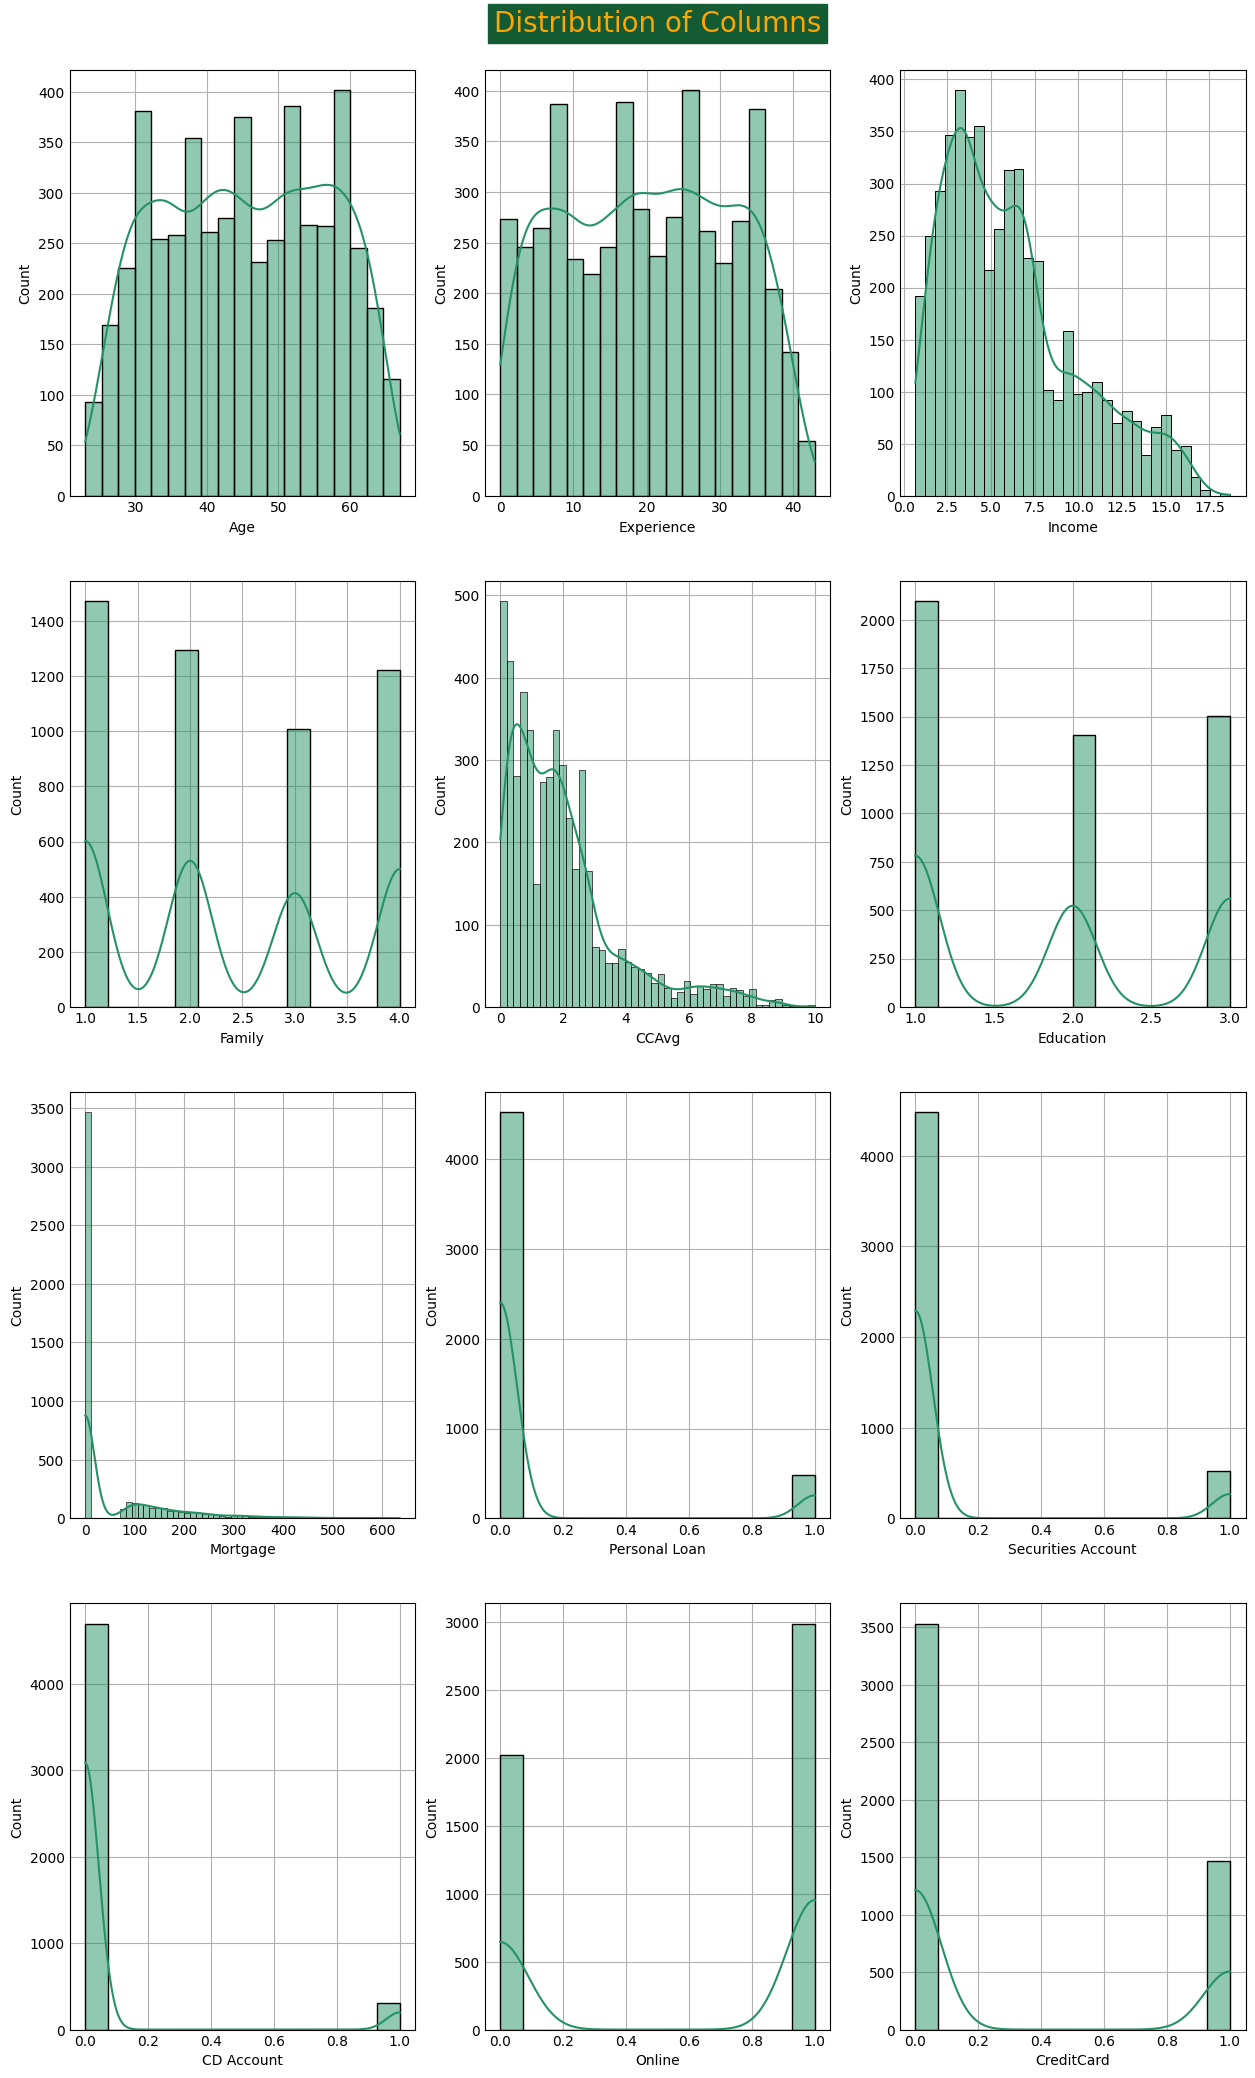

In [21]:
# check distribution Scatter matrix
sns.set_palette('summer')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

# Univariate Analysis

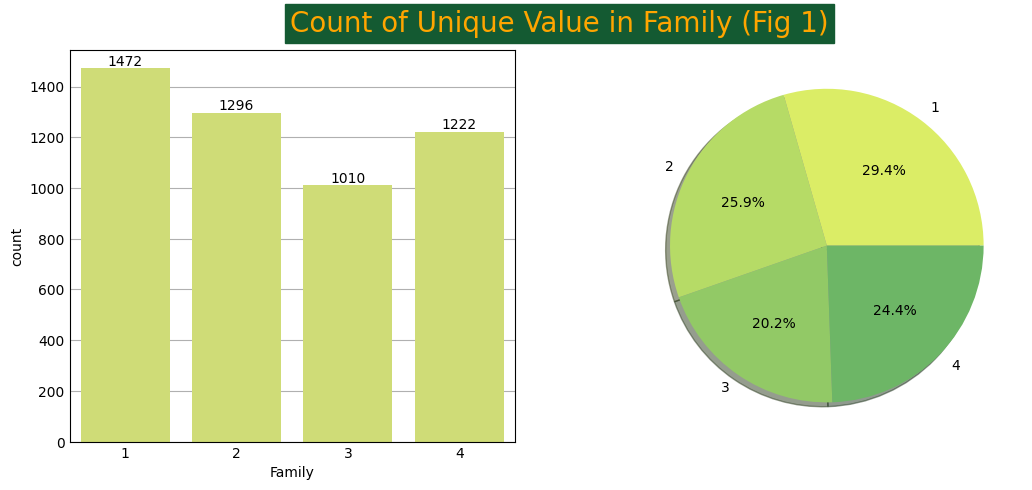

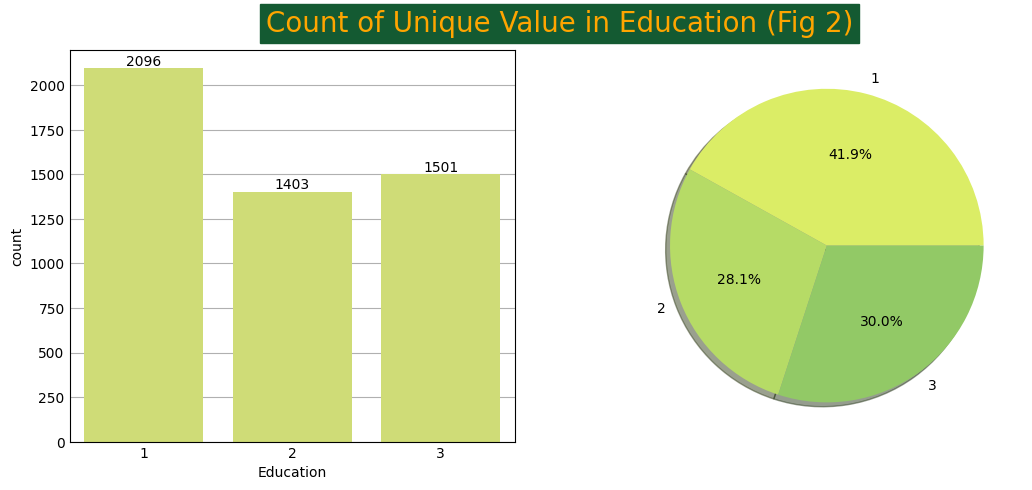

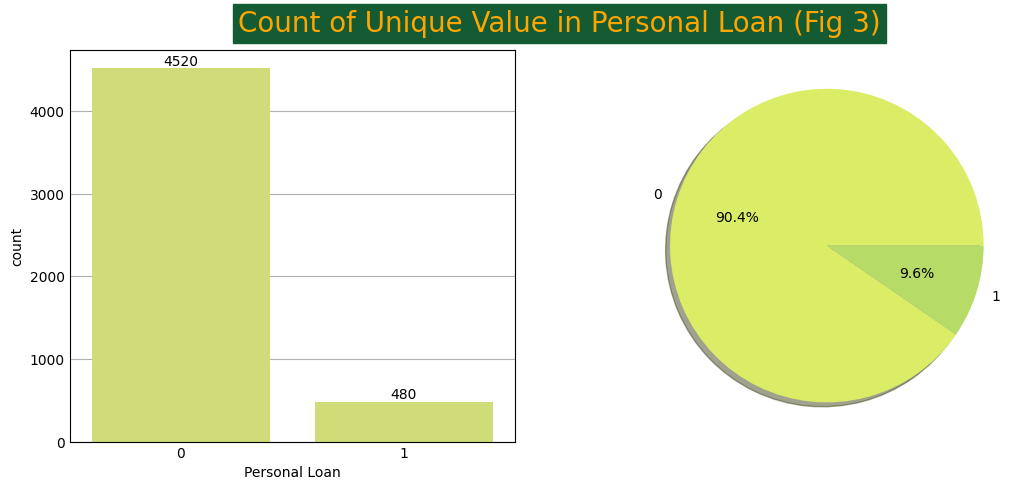

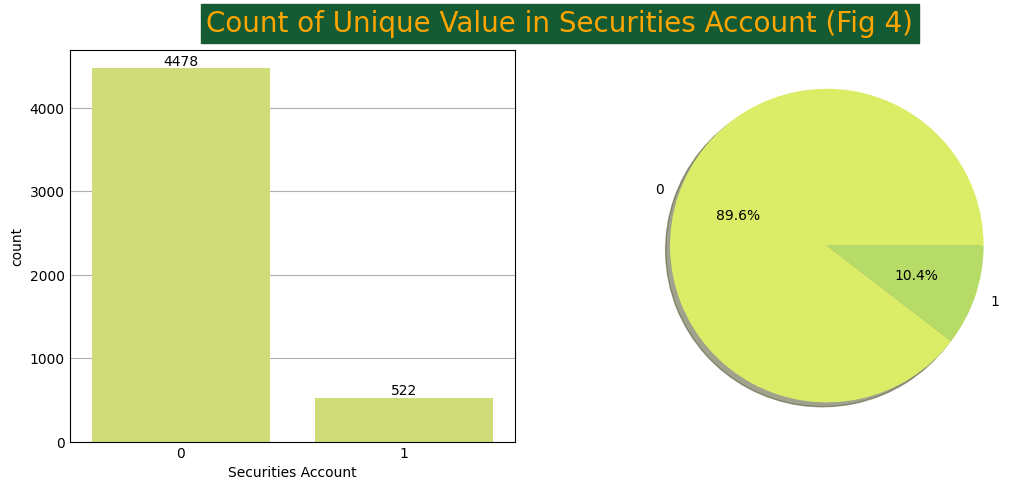

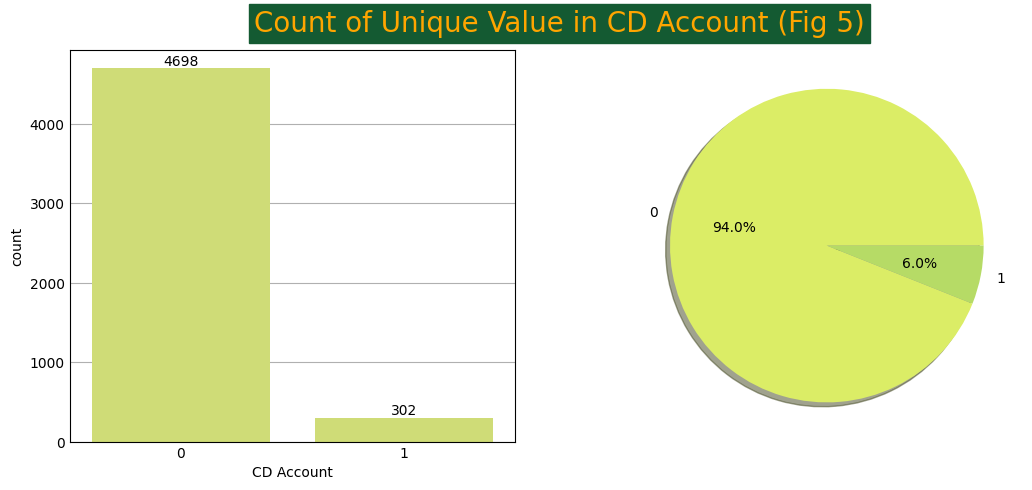

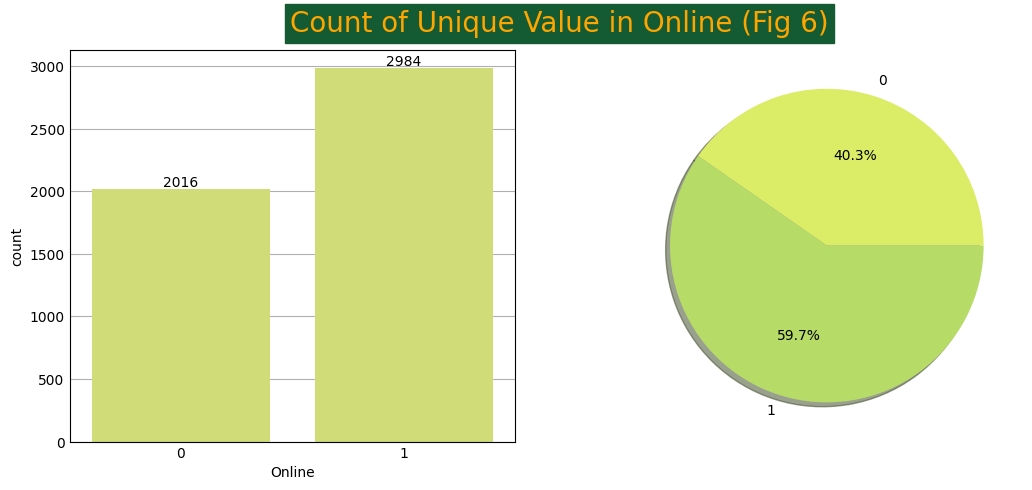

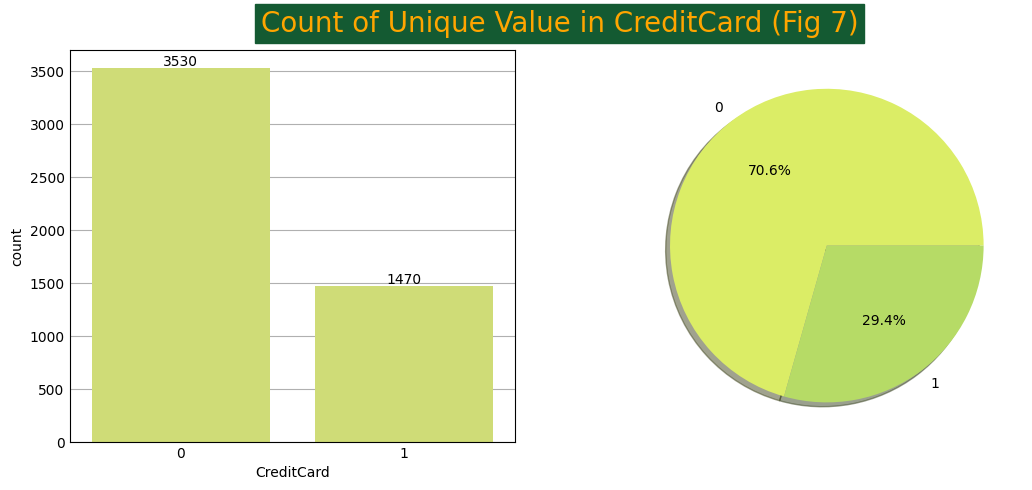

In [22]:
# univariate analysis of categorical data:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [23]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T

count       mean         std    min    25%    50%     75%     max
Age         5000.0  45.338400   11.463166  23.00  35.00  45.00   55.00   67.00
Experience  5000.0  20.134600   11.415189   0.00  10.00  20.00   30.00   43.00
Income      5000.0   6.147912    3.836233   0.67   3.25   5.33    8.17   18.67
CCAvg       5000.0   1.937938    1.747659   0.00   0.70   1.50    2.50   10.00
Mortgage    5000.0  56.498800  101.713802   0.00   0.00   0.00  101.00  635.00

According to above plots and tabel:




*  Customers with the number of Family 1 and the number of Family 3
respectively have the highest frequency and the lowest frequency, but in general, the customers with the number of Family 1, 2, 3, and 4 are almost equally distributed in the dataset (Fig 1).
*   The customers who did not accept a Personal Loan are much more than
the customers who accepted a Personal Loan, and therefore there is an imbalance in the classes, so we must be careful to consider the imbalance in the model section for resampling the data.


*   Most of the bank's customers have education level 1 i.e. Undergrad (Fig 2).
*   Most of the bank's customers (90.4%) did not accept the personal loan offer (Fig 3).

*   Most of the bank's customers (89.6%) did not have a Securities Account (Fig 4).
*   Most of the bank's customers (94%) did not have a CD Account (Fig 5).

*  Most of the bank's customers (59.7%) used internet banking facilities (Fig 6).
*   Most of the bank's customers (70.6%) did not use a credit card issued by Universal Bank(Fig 6).

# Bivariate Analysis

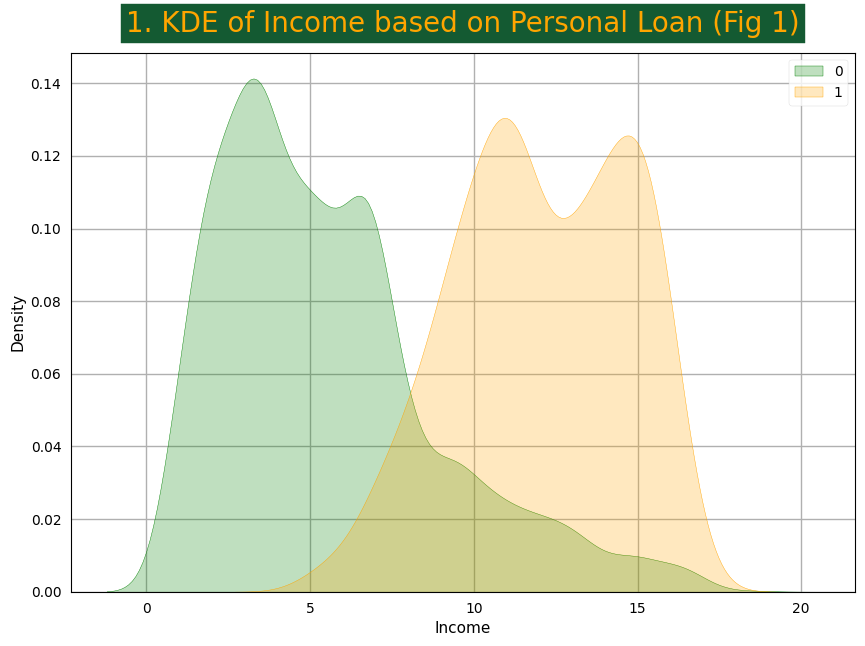

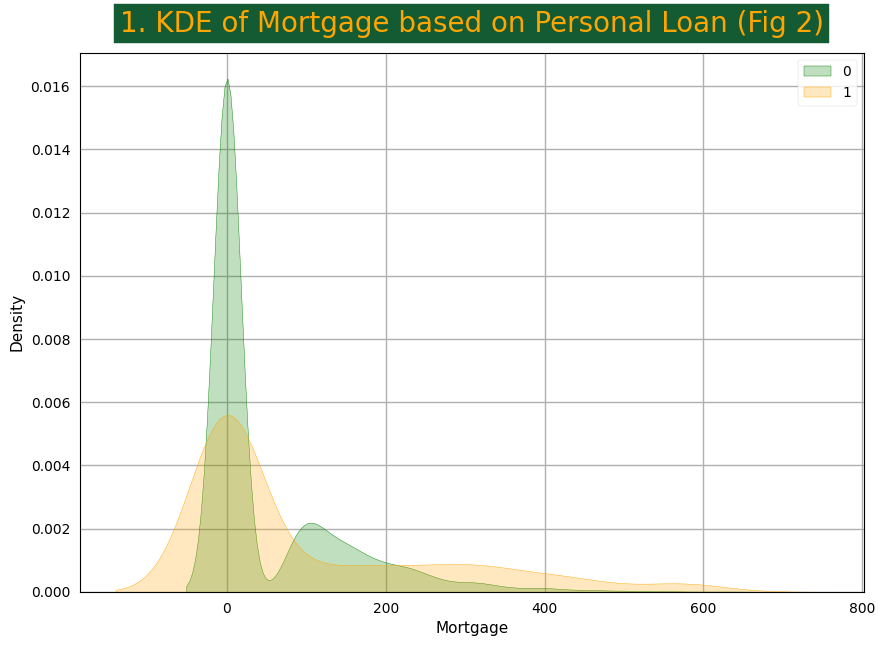

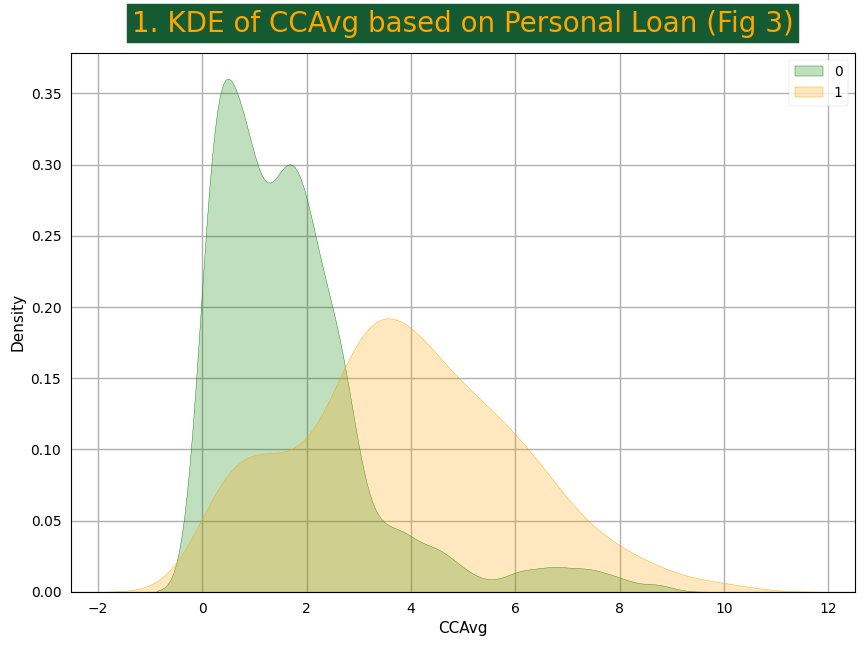

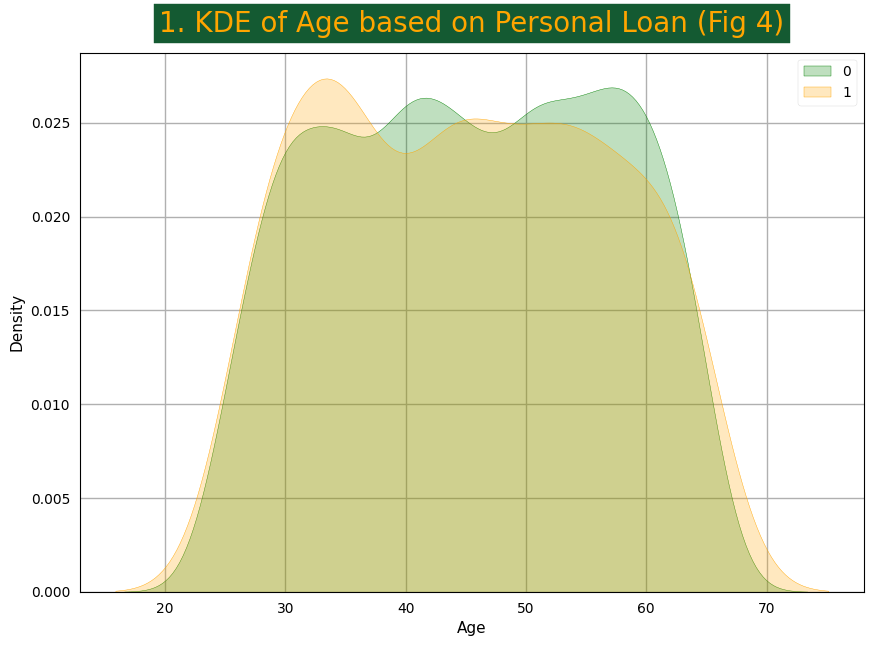

In [24]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set_palette(['green','orange'])
for j, col in enumerate(['Income','Mortgage','CCAvg','Age']):
    for i, label in enumerate(df['Personal Loan'].unique().tolist()):
        sns.kdeplot(df.loc[df['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'1. KDE of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

According to above plots:
*  The Income of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose monthly Income is more than 8 thousand dollars have accepted a bank loan (Fig 1)
*   Most people who accepted a bank loan had mortgage euqal to zero (Fig 2).

*   The CCAvg of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose CCAvg is more than 3 thousand dollars have accepted a bank loan (Fig 3).
*  It seems that age does not have much influence in determining whether or not to accept a bank loan (Fig 4)





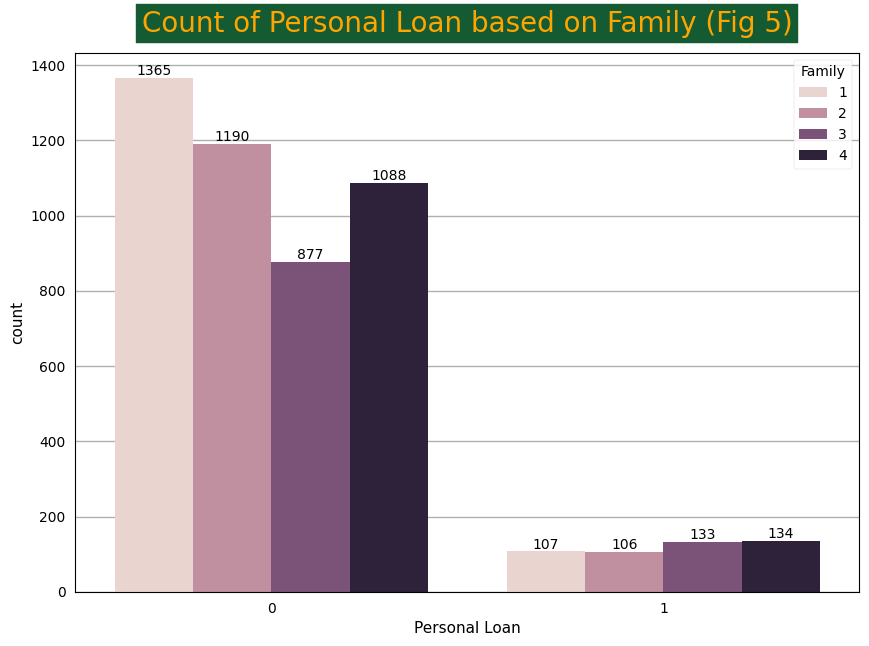

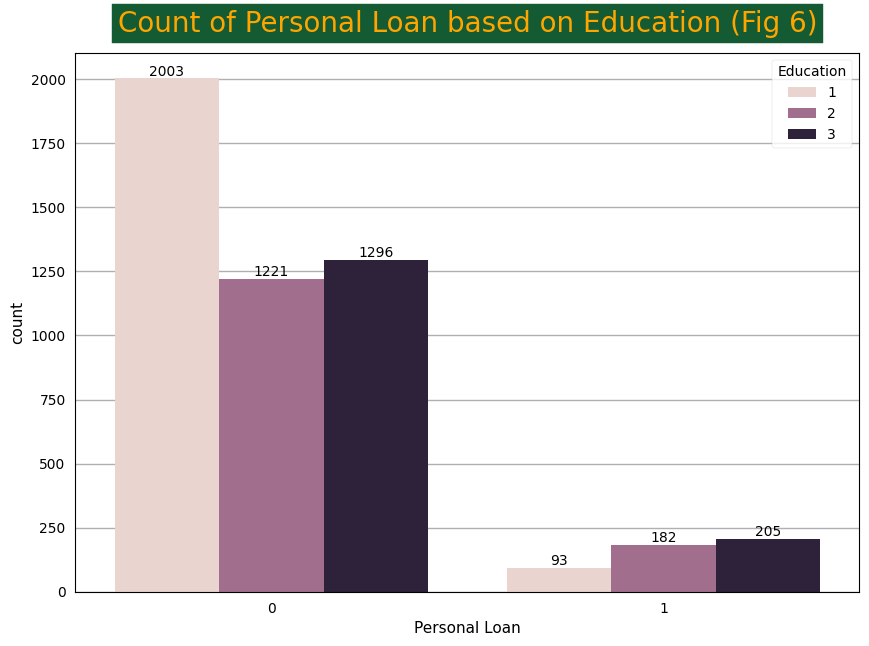

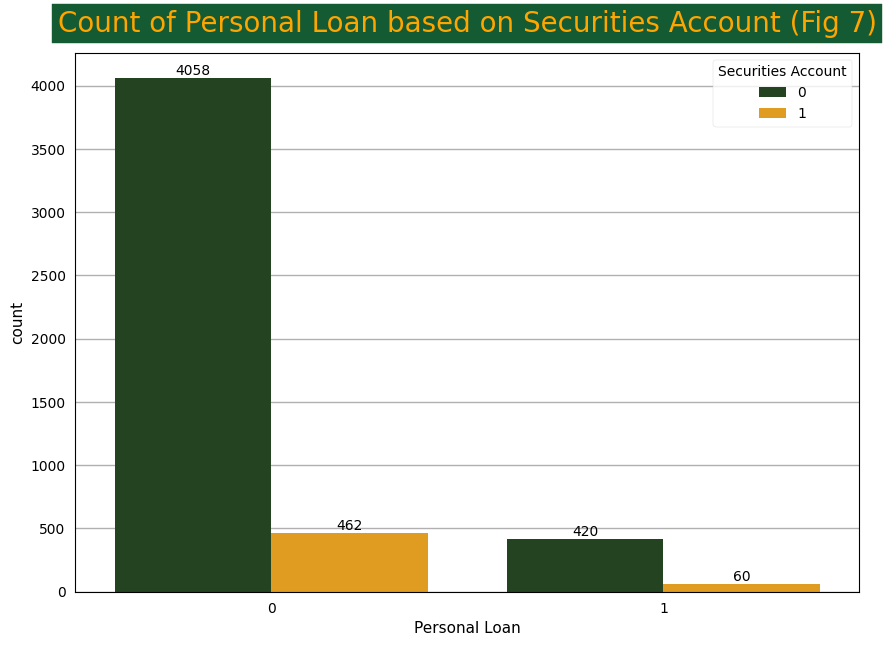

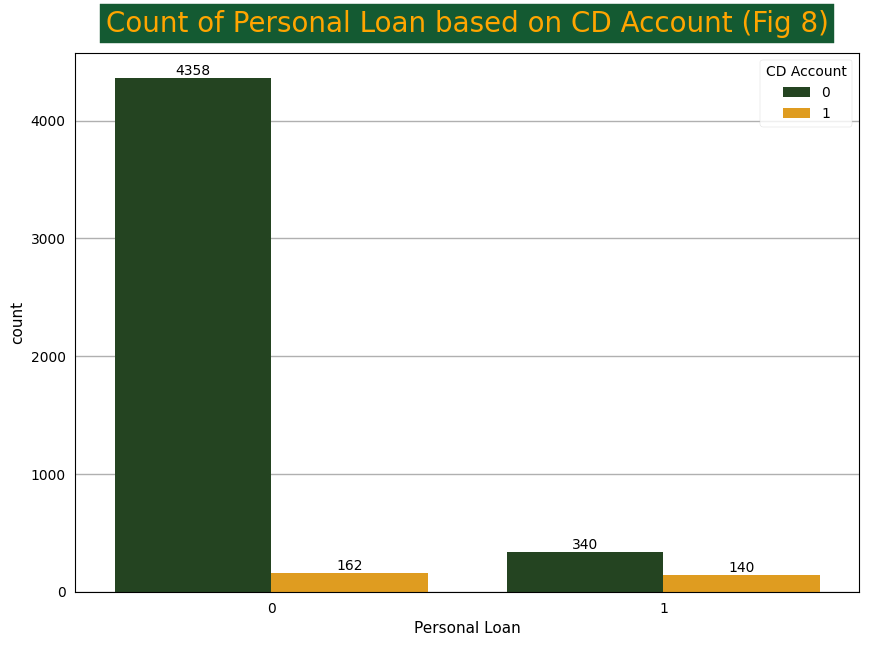

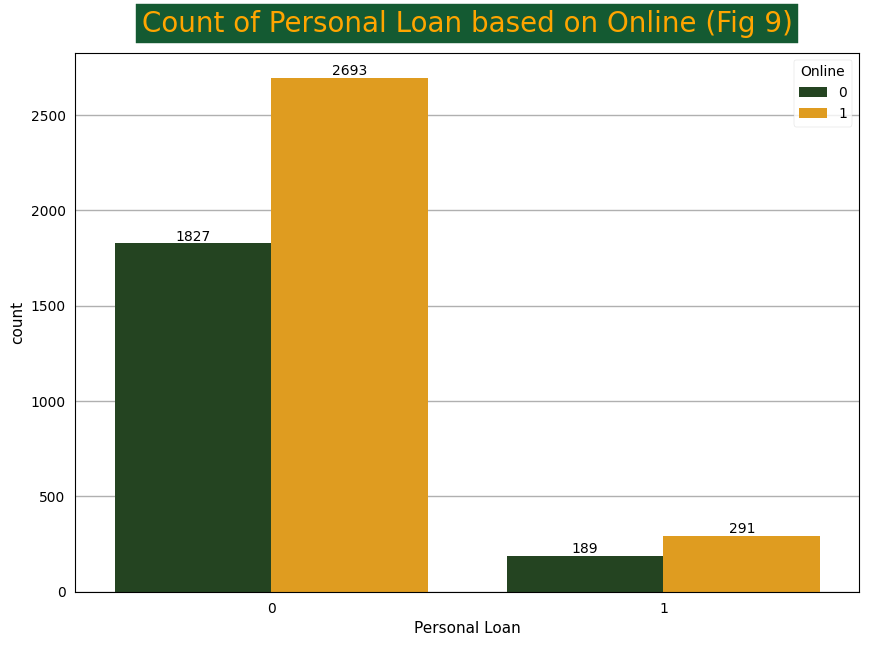

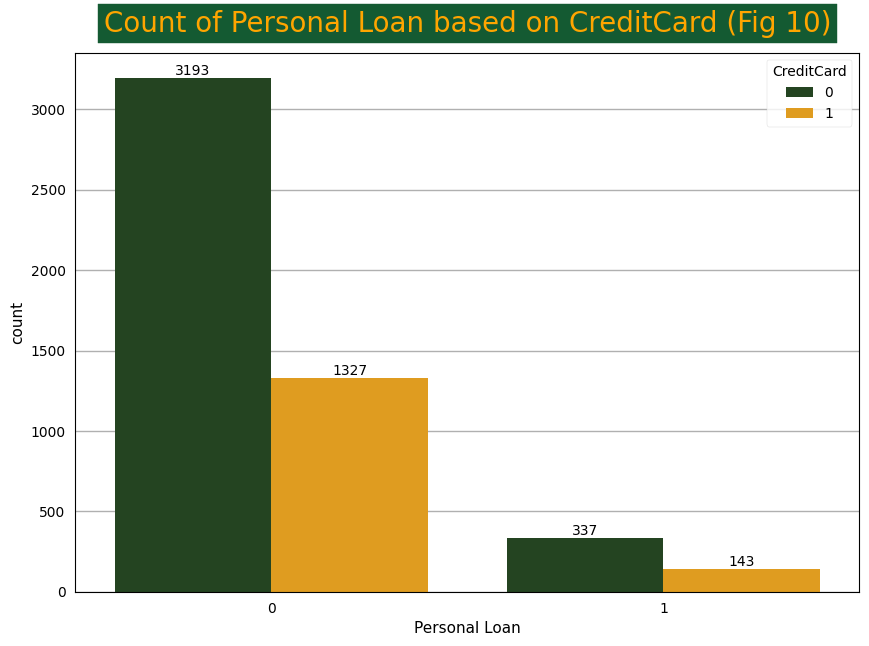

In [25]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
discrete_cols2 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i, col in enumerate(discrete_cols2):
    ax = sns.countplot(data=df, x='Personal Loan', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Personal Loan based on {col} (Fig {i+5})', fontdict=FONT, pad=15)
    plt.show()

According to above plots:
*   Among the people who did not accept the personal loan, most of them had a family equal to 1, but among the people who accepted the personal loan, there is not much difference in terms of family (Fig 5).
*   Among the people who did not accept the personal loan, most of them had an Education of 1, but among the people who accepted the personal loan, the Education was mostly 3 or 2 (Fig 6).

*  Most of the people, both those who accepted the personal loan and those who did not, did not have a Securities Account (Fig 7).
*   Most of the people, both those who accepted the personal loan and those who did not, did not have a CD Account (Fig 8).

*   Most of the people, both those who accepted the personal loan and those who did not, used online banking facilities (Fig 9).
*   Most of the people, both those who accepted the personal loan and those who did not, did not use a Creditcard (Fig 10).


============================== Mean of Income in each categorical feature ==============================


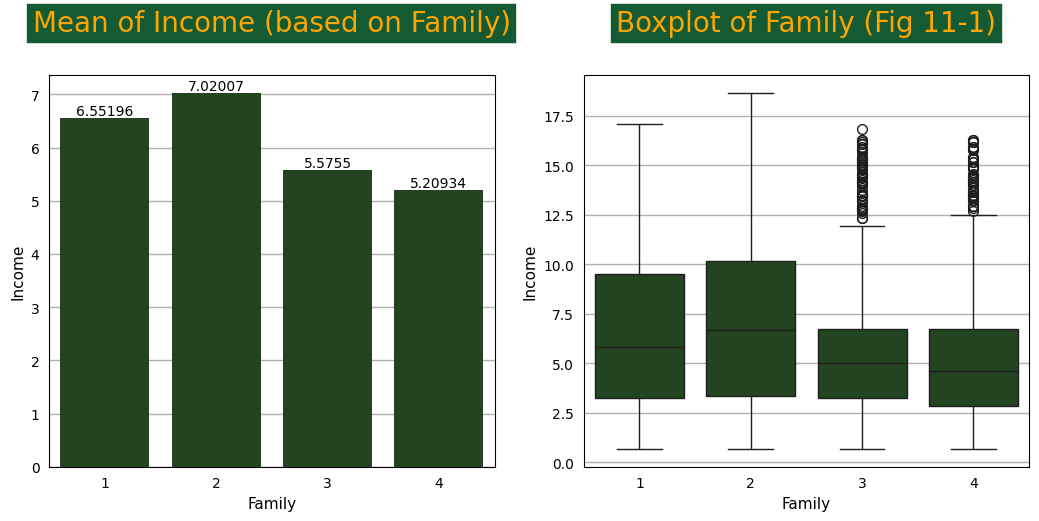

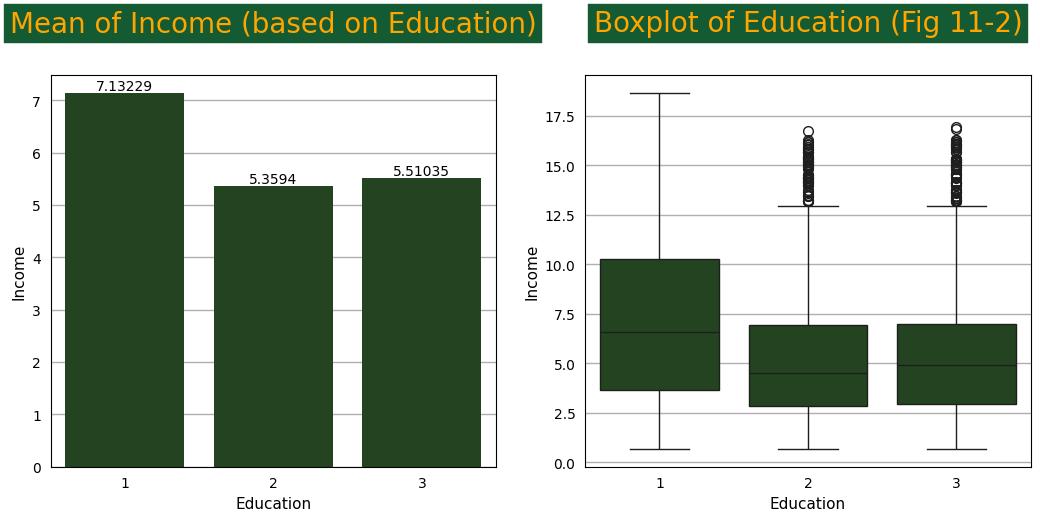

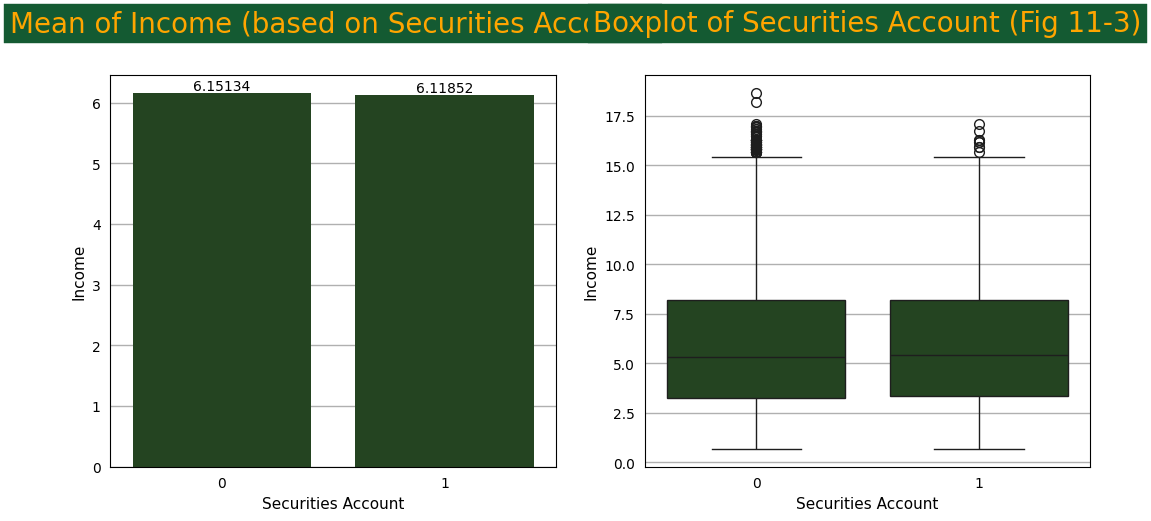

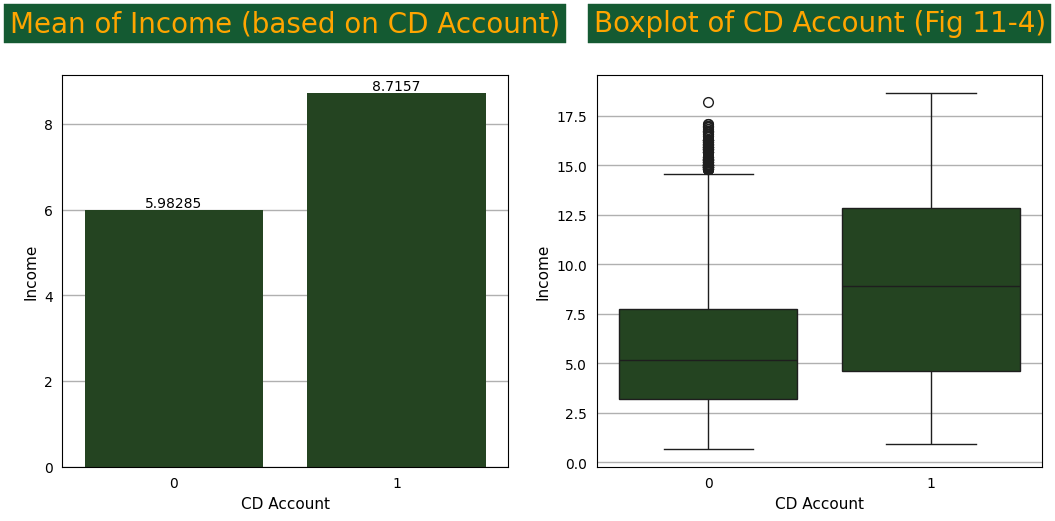

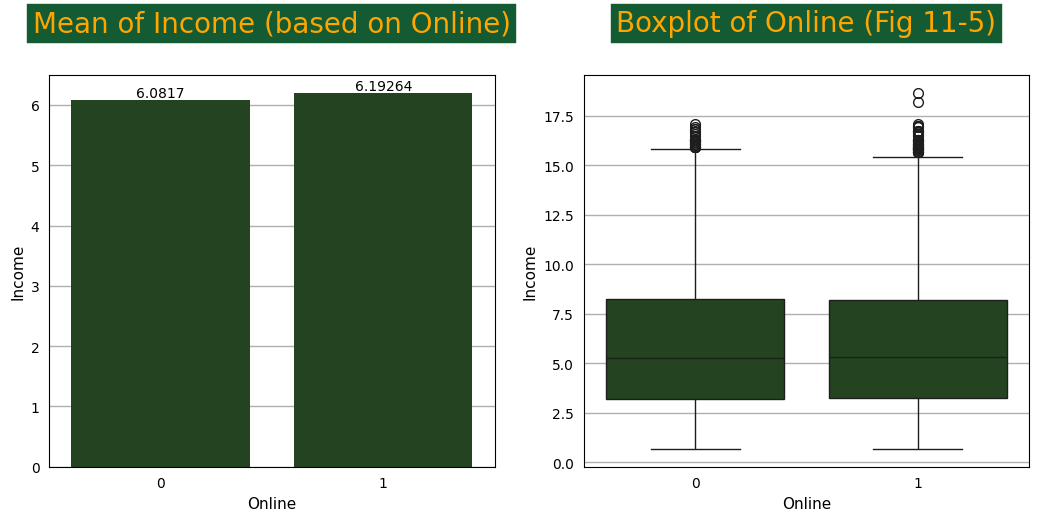

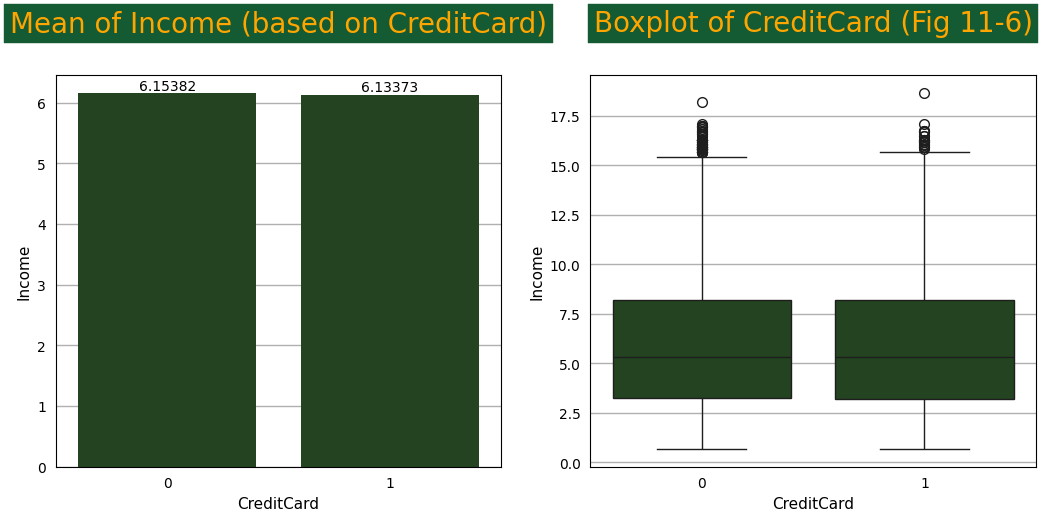

============================== Mean of CCAvg in each categorical feature ==============================


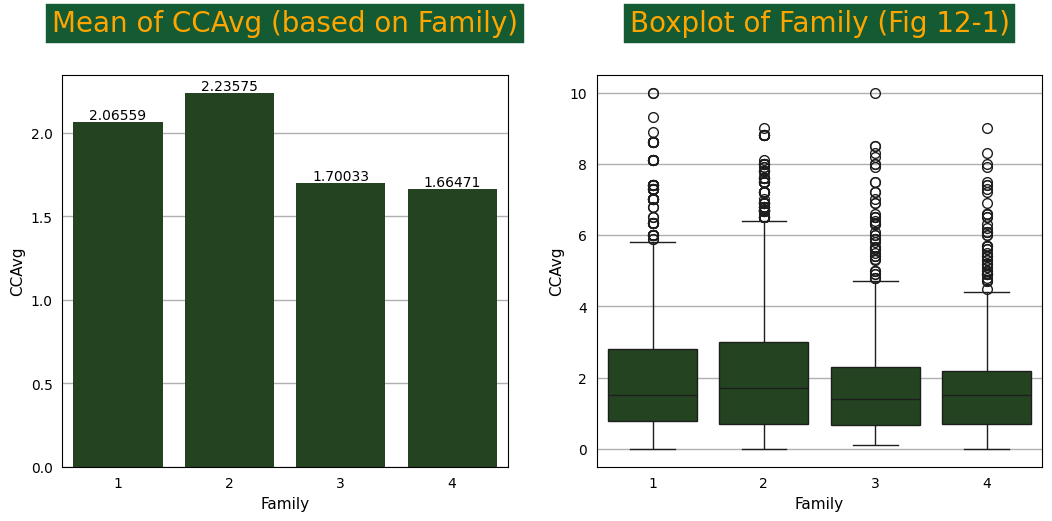

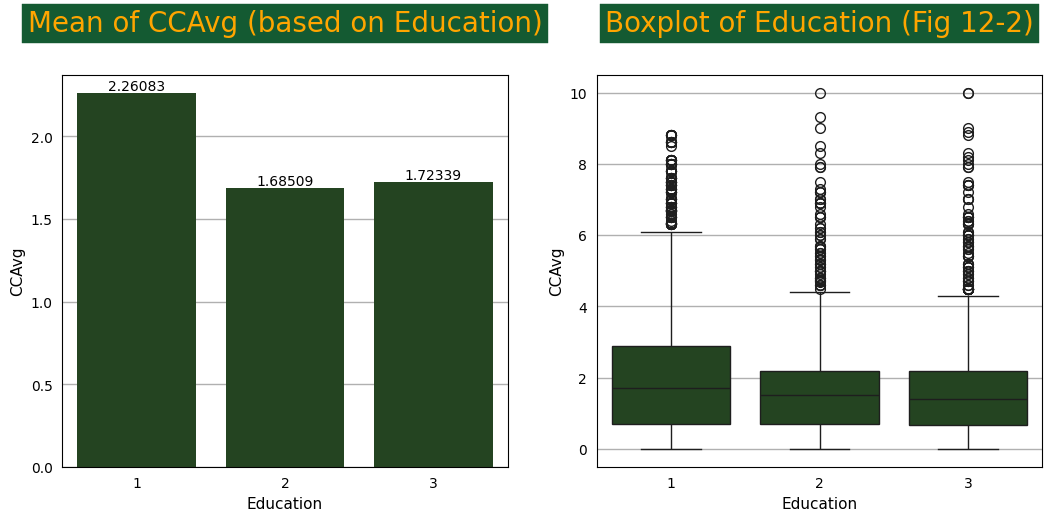

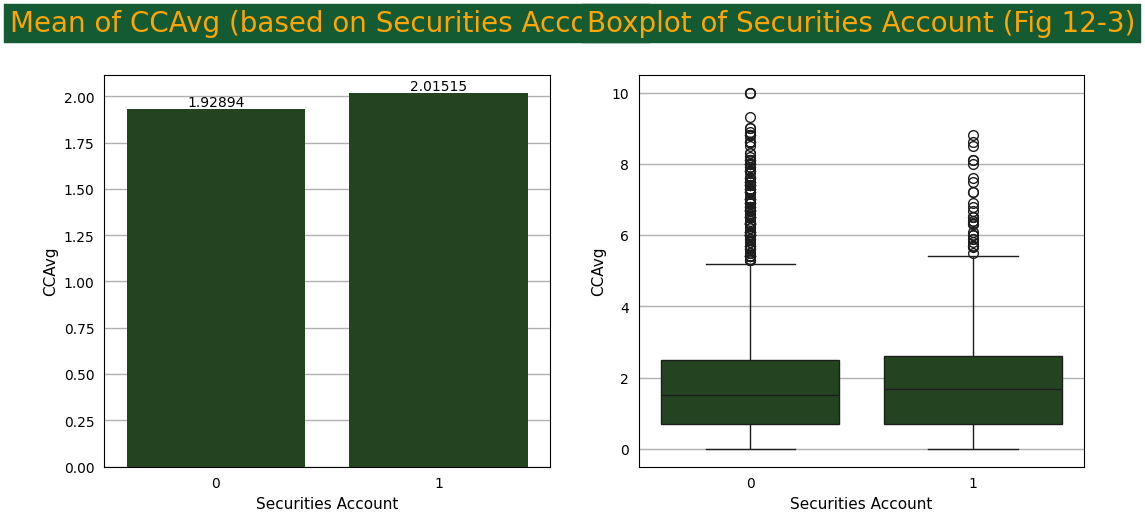

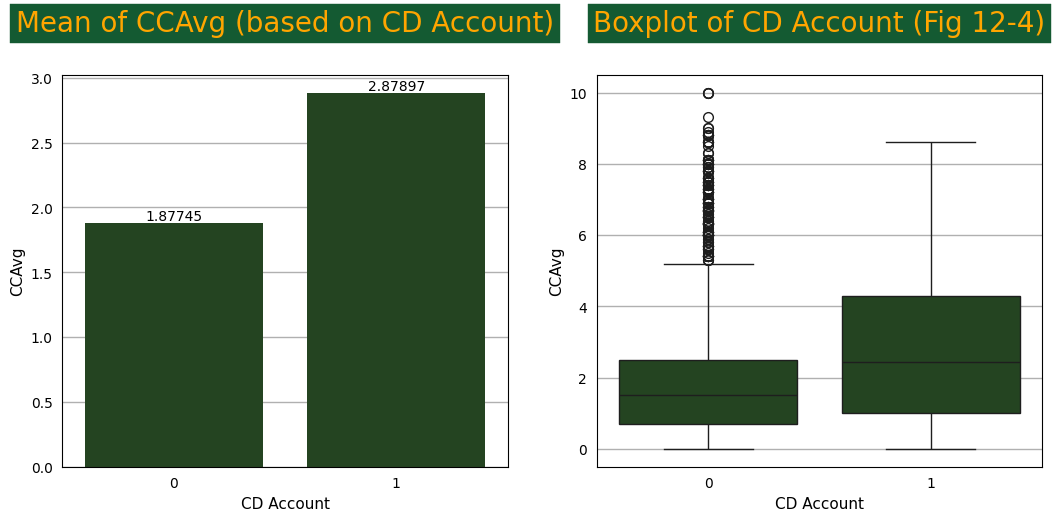

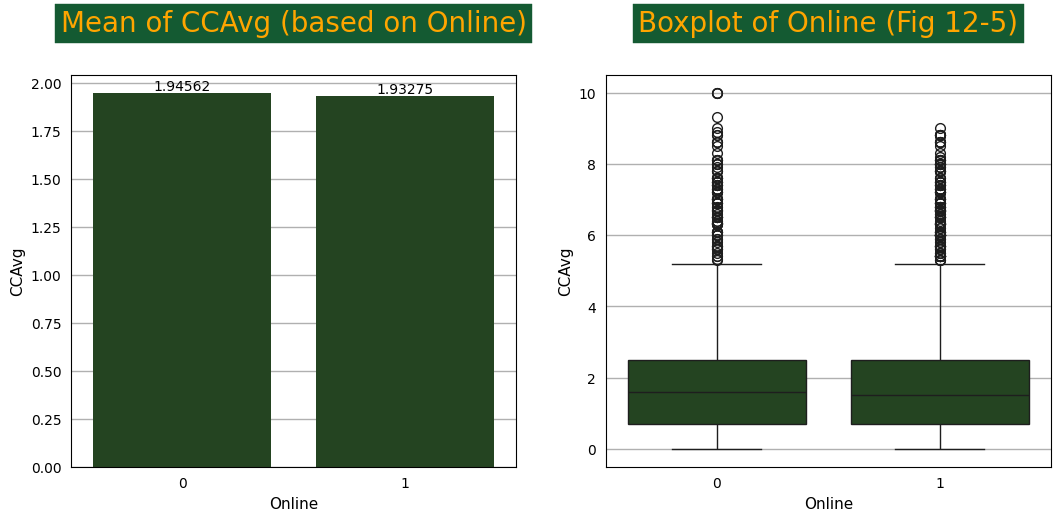

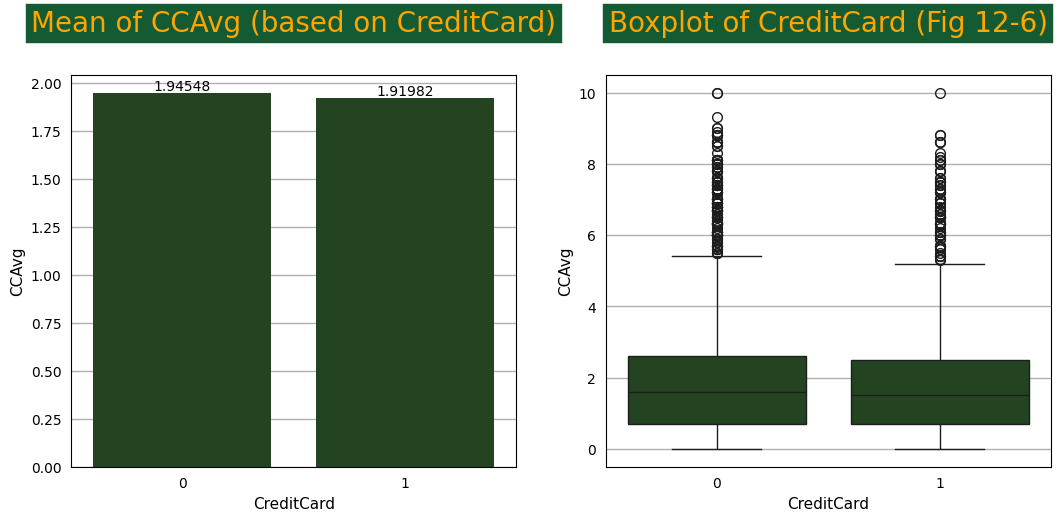

============================== Mean of Mortgage in each categorical feature ==============================


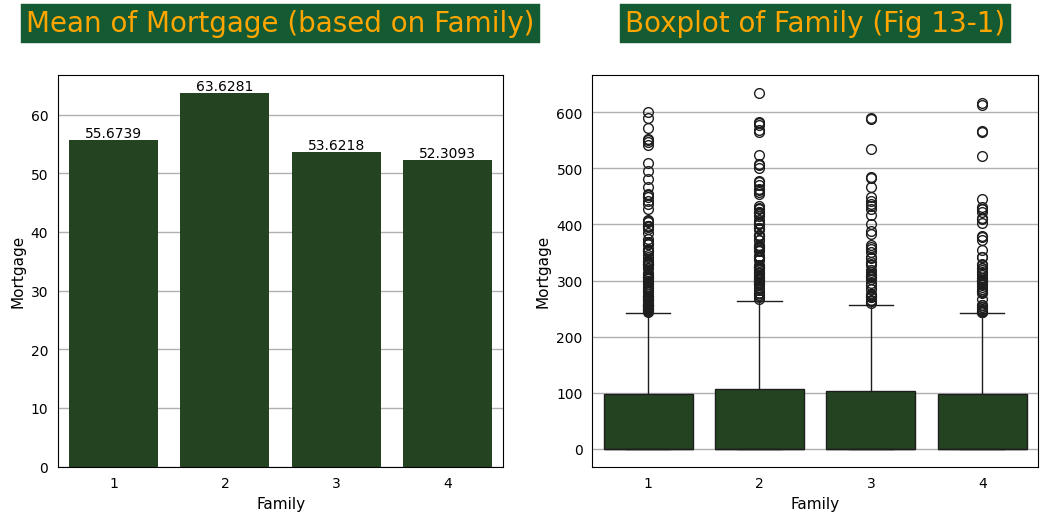

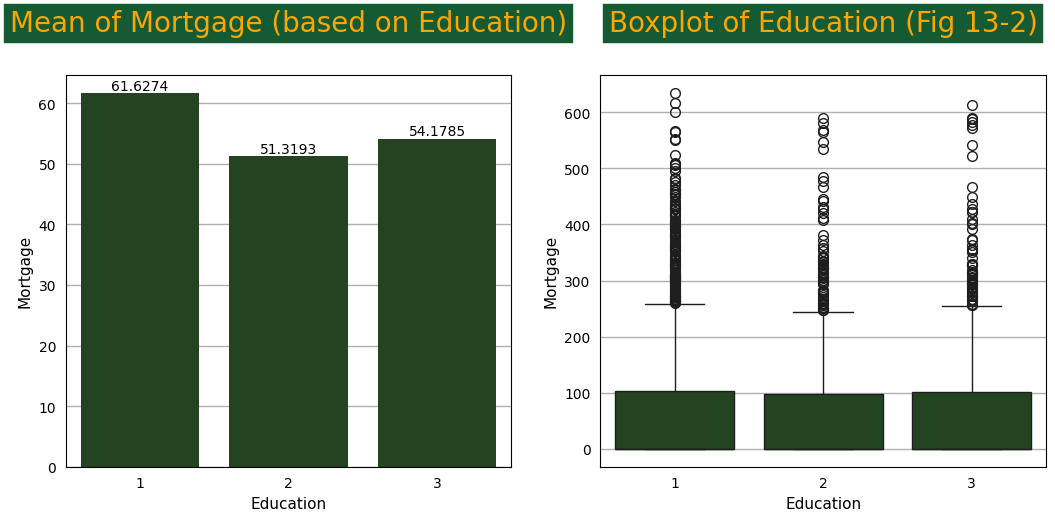

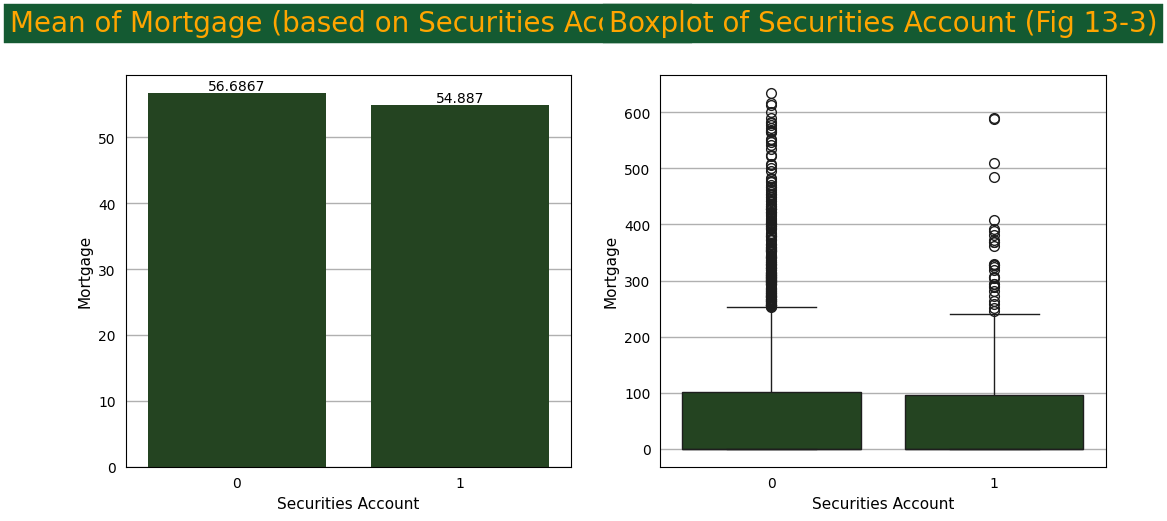

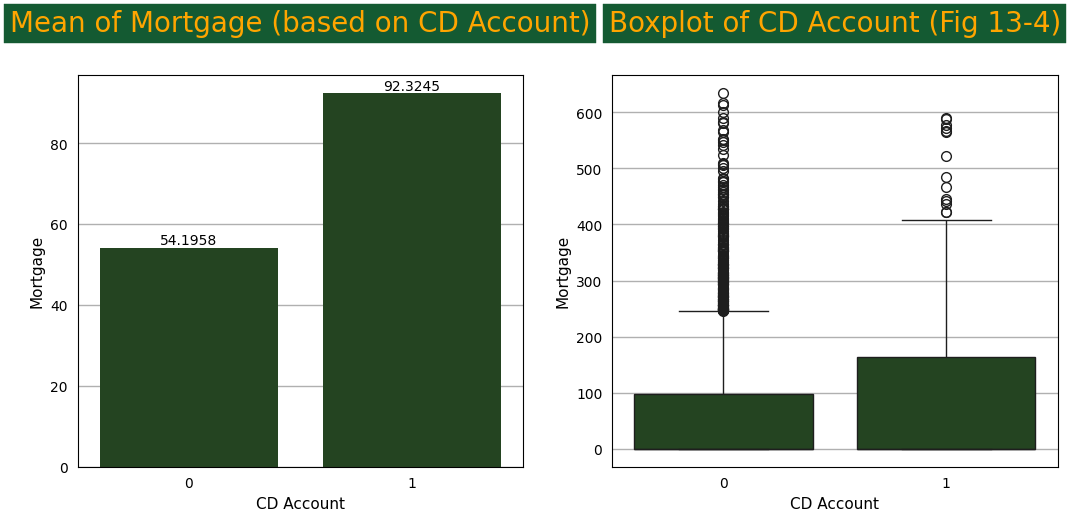

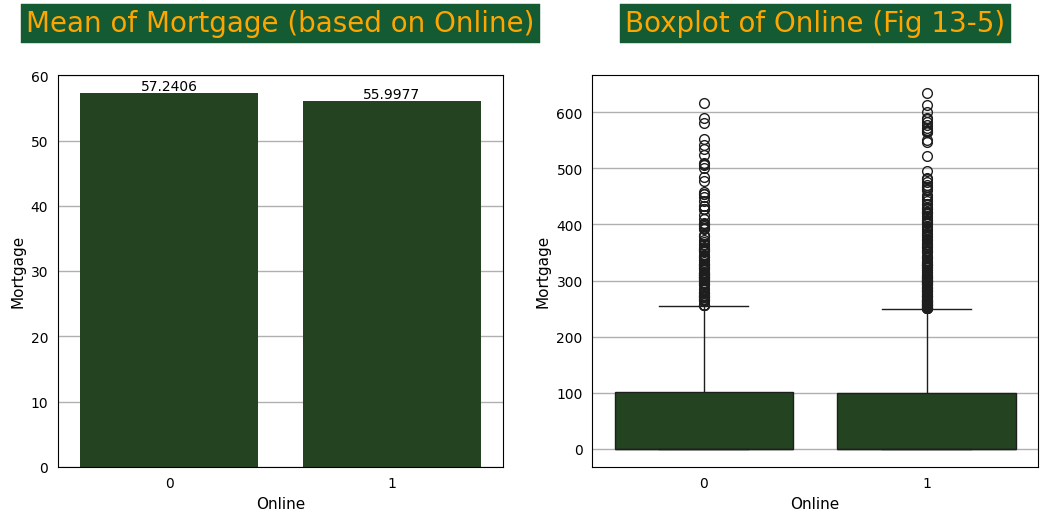

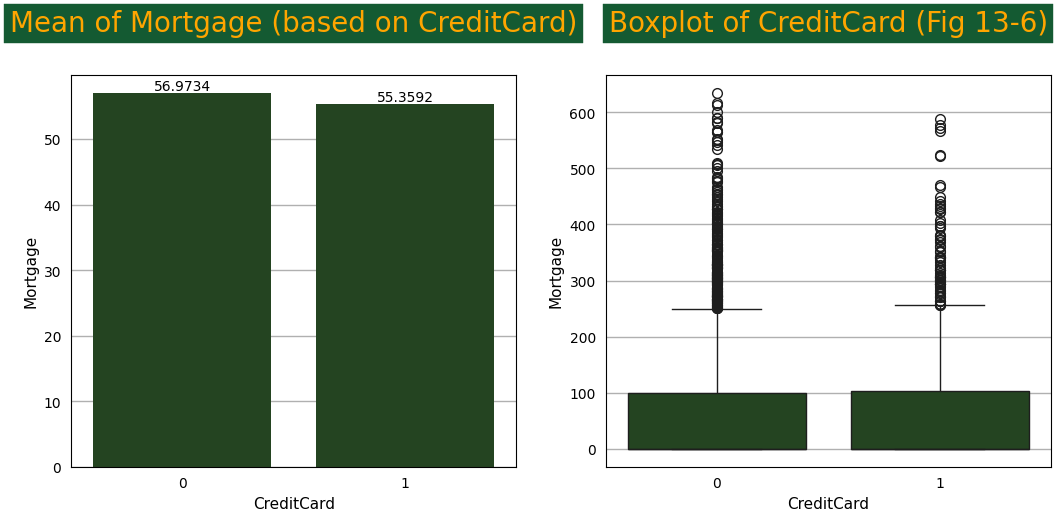

In [26]:
# Mean of Income and CCAvg based on each feature
for i, col in enumerate(['Income', 'CCAvg','Mortgage']):
    print('='*30, f"Mean of {col} in each categorical feature", '='*30)
    for j, cat in enumerate(discrete_cols2):
        fig , ax= plt.subplots(1,2, figsize=(10,4))
        gp = df.groupby([cat])[col].mean().to_frame().reset_index()
        sns.barplot(data=gp, x=cat, y=col, ax=ax[0])
        for container in ax[0].containers:
            ax[0].bar_label(container)
        ax[0].set_title(f'Mean of {col} (based on {cat})', y=1.09, **FONT)

        sns.boxplot(data=df, x=cat, y=col, ax=ax[1])
        ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.09, **FONT)

        plt.show()

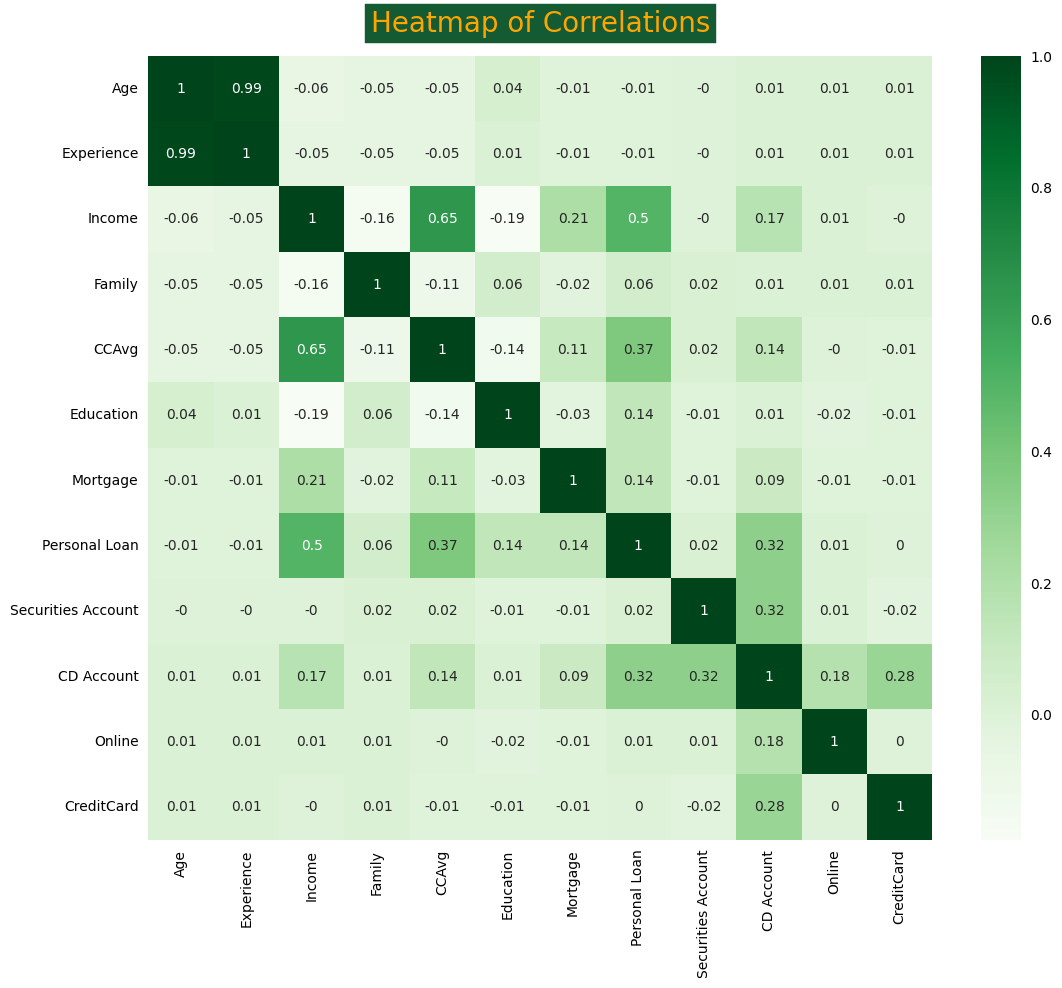

In [27]:
# draw heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02, fontdict=FONT)
plt.show()

According to above plots:


*   Customers whose Family was 2 had the highest average Income (7.02 thousand $, Fig 11-1).

*   Unexpectedly, customers whose Education was 1 had the highest average Income (7.13 thousand $, Fig 11-2).

*   The average income of customers whose Secutities Account and CreditCard and Online was 1 is the same as that of those was zero(6.1 thousand doller, Fig 11-3,5,6).
*  The average income of those who have a CD account is higher than that of customers who do not have a CD account (8.7 thousand $, Fig 11-4).
*   Similar results can be obtained for the CCAvg and Mortgage average, which shows that the behavior of the CCAvg, Mortgage and Income columns is somewhat similar to each other (Fig 12-1 to 13-6).

*   According to the heatmap, Personal Loan has the highest correlation with Income, CCAvg and CD Account respectively.

*  Age and experience have a completely linear relationship with each other.


# Multivariate Analysis

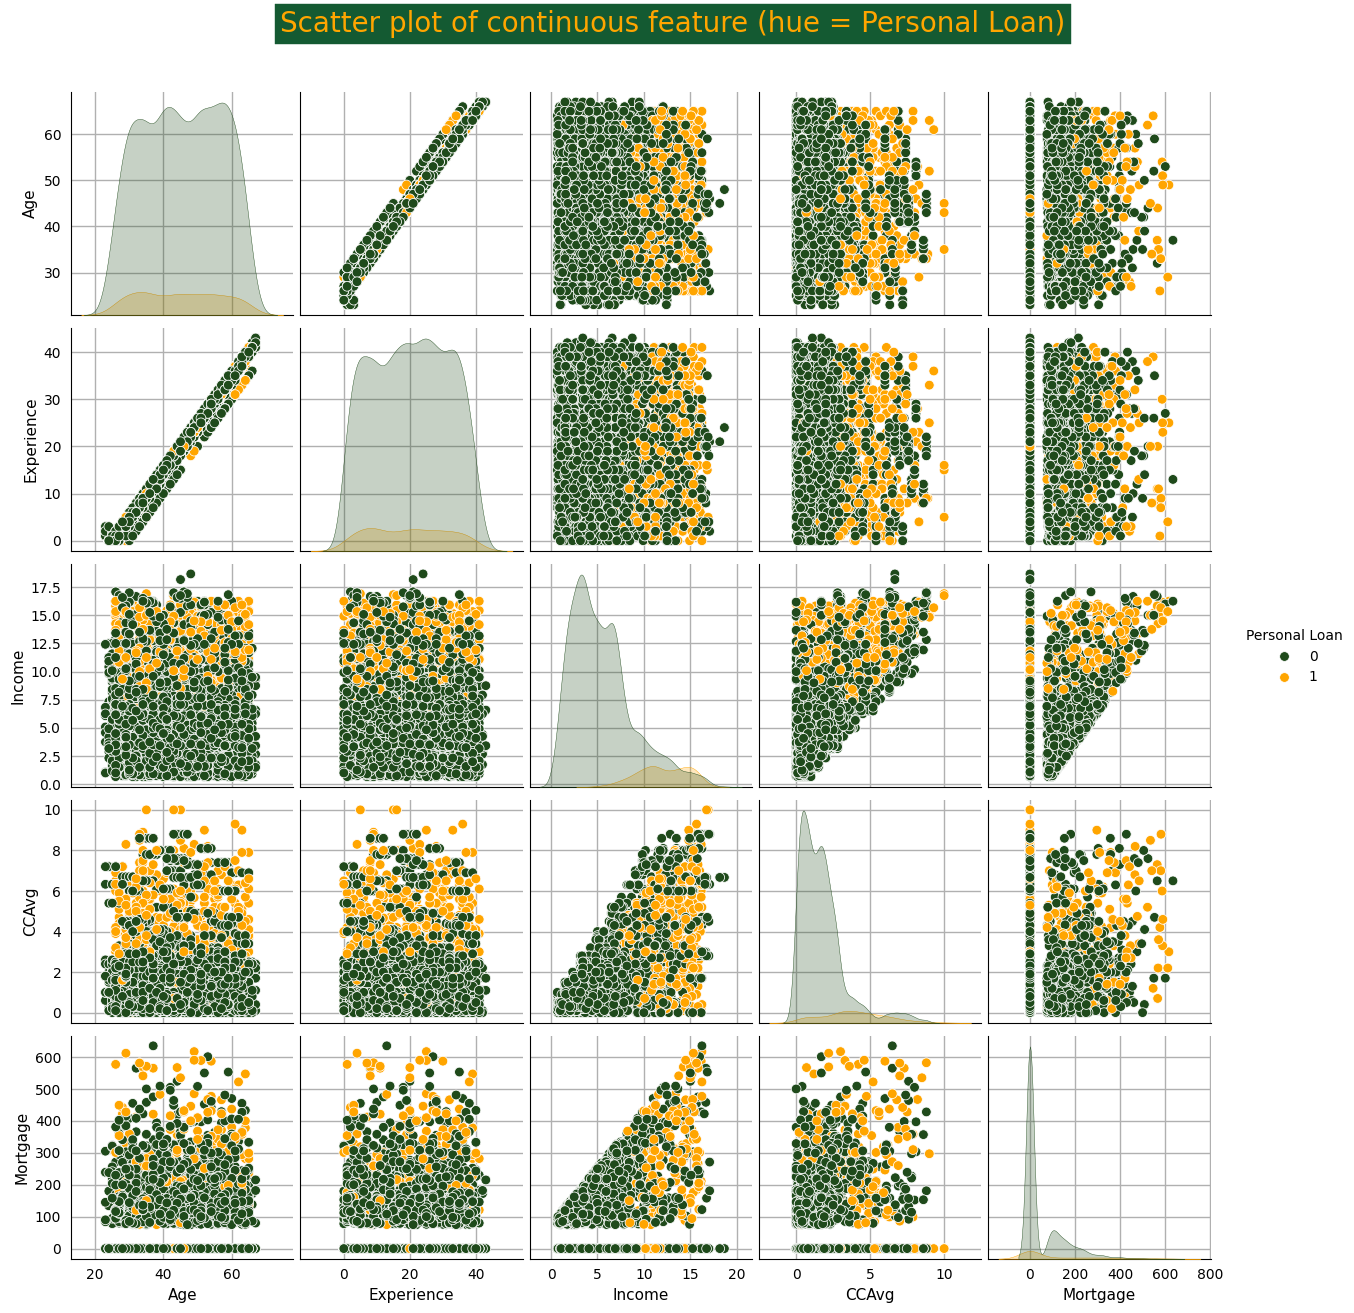

In [28]:
# draw pairplot with hue = Personal Loan
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05, **FONT)
plt.show()

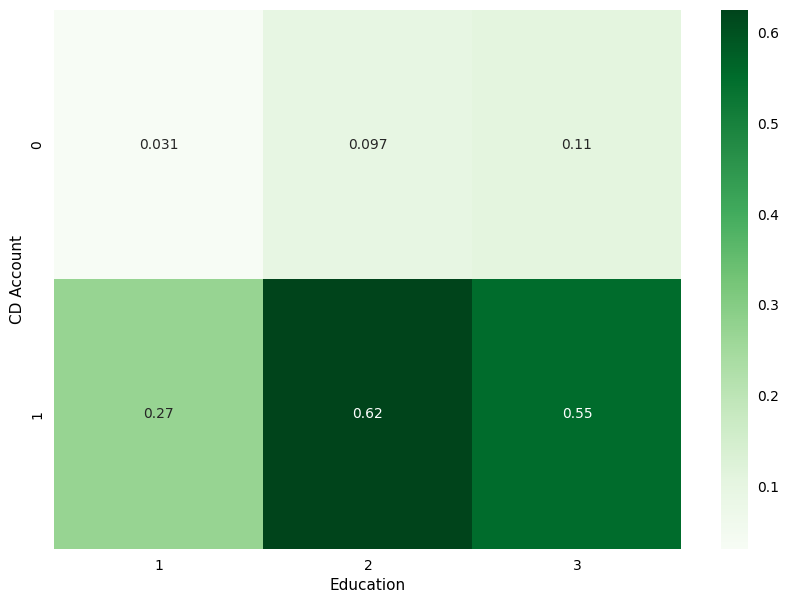

In [29]:
results = pd.pivot_table(data=df, index='CD Account', columns='Education', values='Personal Loan')
sns.heatmap(results, cmap='Greens', annot=True)
plt.show()

According to above plots:
*   Customers whose Income is less than 5 thousand dollers per month have not accepted a personal loan.
*   Most customers whose income is less than 10 thousand dollars per month and their CCAvg is less than 3 thousand doller per month have not accepted a personal loan.
*   62% of customers whose CD Account was 1 and Education was 2 have accepted a personal loan.



# Models and Improve Models

In [30]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [31]:
# define x and y
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values.reshape(-1,1)

In [32]:
Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)

    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def change_test_size(model, x, y, name):
    # try to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')

# --------------------------------------------------------------------------------------

def plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR(list): list of False Positive Rate
        TPR(list): list of True Positive Rate
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    fig1 = go.Figure()
    fig2 = go.Figure()
    # the green line represents where TPR = FPR
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'),x0=0, x1=1, y0=0, y1=1)
    for fpr_i, tpr_i, auc_i, name in zip(FPR, TPR, AUC, Model):
        # ROC Curve
        fig1.add_trace(go.Scatter(x=fpr_i, y=tpr_i, name=f"{name} AUC = {auc_i:.4f}", mode='lines'))
    # the histogram of scores compared to true labels
    fig_hist = px.histogram(x=y_proba_test[:,1], color=y_test.ravel(), nbins=50, labels=dict(color='Personal Loan', x='Probability'))
    fig2.add_trace(fig_hist.data[0])
    fig2.add_trace(fig_hist.data[1])
    # Reduce opacity to see both histograms
    fig2.update_traces(opacity=0.75)

    # Accuracy plot
    fig3 = make_subplots(rows=1, cols=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Recall, mode='lines+markers', name='Recall', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Precision, mode='lines+markers', name='Precision', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=F1, mode='lines+markers', name='F1 score', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)

    fig3.add_trace(go.Scatter(y=ACC_train, mode='lines+markers', name='ACC train', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)

    # update layout and show figs

    fig1.update_layout(
        title= 'ROC curve and AUC score',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500,
        showlegend=True)
    fig2.update_layout(
        # showlegend=True,
        barmode='overlay',  # Overlay both histograms
        title='Interpret ROC curve by histogram',
        xaxis_title='Probability',
        yaxis_title='Count')

    fig3.update_layout(
        showlegend=True,
        title='Model Evaluation & Train and Test Accuracy)',
        xaxis_title='Model',
        yaxis_title='Evaluation measure')
    # Set custom x-axis labels
    fig3.update_xaxes(ticktext=list(range(1,20)))
    fig1.show()
    fig2.show()
    fig3.show()

# --------------------------------------------------------------------------------------

def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # split data to train and test
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Class Distribution in y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")

    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Class Distribution in y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")

    # Normalization
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # define model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # append results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, rec_test, rec_train

# MultinomialNB( )

In [33]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
# Check cross validation on Multinomial model to estimate model performance (Accuracy)
# use MinMaxScaler instead of StandardScaler for prevent negative number
pipe1 = Pipeline([('scaler', MinMaxScaler()), ('clf', MultinomialNB())])
Perform_cross_val(pipe1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9045
CV results: [0.9075 0.905  0.905  0.905  0.9075 0.905  0.9025 0.9025 0.9025 0.9025]



In [35]:
# Check cross validation on Multinomial model to estimate model performance (Recall)
Perform_cross_val(pipe1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.005263157894736842
CV results: [0.02631579 0.         0.         0.         0.02631579 0.
 0.         0.         0.         0.        ]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[904   0]
 [ 95   1]]


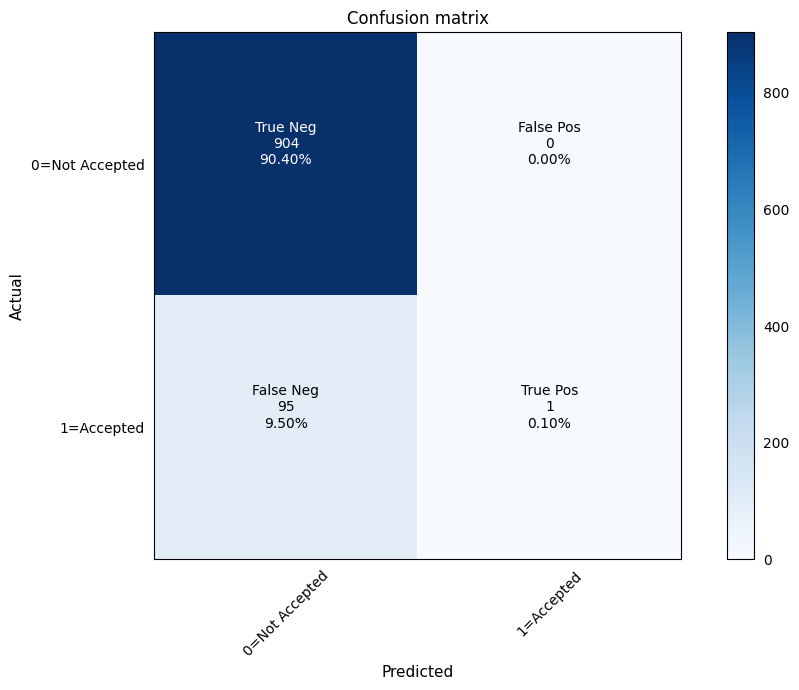

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       904
           1       1.00      0.01      0.02        96

    accuracy                           0.91      1000
   macro avg       0.95      0.51      0.49      1000
weighted avg       0.91      0.91      0.86      1000
 

Jaccard Score: 0.010416666666666666
Log loss: 3.424147071966129 



In [36]:
# create initial model with MultinomialNB algorithm
acc_test_1_1, acc_train_1_1, rec_test_1_1, rec_train_1_1 = modeling(
    clf=pipe1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='MultinomialNB 1',
    stratify=True)

In [37]:
print(f"Recall train: {rec_train_1_1}")
print(f"Recall test: {rec_test_1_1}")

Recall train: 0.005208333333333333
Recall test: 0.010416666666666666


In [38]:
# check improve model by change test size
change_test_size(pipe1, x, y, 'MultinomialNB')

In [39]:
# create a Dataframe for store accuracy and recall of best model for each algorithm
best_model_test = pd.DataFrame({'Model':[], 'test_size':[], 'Test_Accuracy':[], 'Test_Recall':[]})
best_model_train = pd.DataFrame({'Model':[], 'test_size':[], 'Train_Accuracy':[], 'Train_Recall':[]})
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"MultinomialNB", '0.2', acc_test_1_1, rec_test_1_1]
best_model_train.loc[len(best_model_train.index)] = [f"MultinomialNB", '0.2', acc_train_1_1, rec_train_1_1]

# CategoricalNB( )

To apply this algorithm, all the features must be of category type, so it is necessary to create and save changes in the previous dataset:

In [40]:
df.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

We can see here that the minimum and maximum ages are 23 and 67 respectively.

 The age will be divided into **5 age categories**:
*  Below 30 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  Above 60.

In [41]:
df2 = df.copy()

In [42]:
bin_age = [0, 29, 39, 49, 59, 70]
category_age = ['<30s', '30s', '40s', '50s', '>50s']
df2['Age_binned'] = pd.cut(df2['Age'], bins=bin_age, labels=category_age)
df2 = df2.drop(['Age'], axis = 1)

In [43]:
df.Experience.describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

We can see here that the minimum and maximum Experience are 0 and 43 respectively.

 The age will be divided into **5 Experience categories**:
*  Below 10 y.o.
*  10 - 19 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  Above 40.

In [44]:
bin_experience = [-1, 9, 19, 29, 39, 50]
category_experience = ['<10s', '10s', '20s', '30s', '>30s']
df2['Experience_binned'] = pd.cut(df2['Experience'], bins=bin_experience, labels=category_experience)
df2 = df2.drop(['Experience'], axis = 1)

In [45]:
df.Income.describe()

count    5000.000000
mean        6.147912
std         3.836233
min         0.670000
25%         3.250000
50%         5.330000
75%         8.170000
max        18.670000
Name: Income, dtype: float64

We can see here that the minimum and maximum Income are 0.67 and 18.67 respectively.

 The age will be divided into **4 Income categories**:
*  Below 5 y.o.
*  5 - 9 y.o.
*  10 - 14 y.o.
*  Above 15.

In [46]:
bin_income = [0, 4, 9, 14, 20]
category_income = ['<5s', '5s', '10s', '10>s']
df2['Income_binned'] = pd.cut(df2['Income'], bins=bin_income, labels=category_income)
df2 = df2.drop(['Income'], axis = 1)

In [47]:
df.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

We can see here that the minimum and maximum CCAvg are 0 and 10 respectively.

 The age will be divided into **5 CCAvg categories**:
*  Below 2 y.o.
*  2 - 3 y.o.
*  4 - 5 y.o.
*  6 - 7 y.o.
*  Above 8.

In [48]:
bin_CCAvg = [-1, 1, 3, 5, 7, 10]
category_CCAvg = ['<2s', '2s', '4s', '6s', '>6s']
df2['CCAvg_binned'] = pd.cut(df2['CCAvg'], bins=bin_CCAvg, labels=category_CCAvg)
df2 = df2.drop(['CCAvg'], axis = 1)

In [49]:
df.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

We can see here that the minimum and maximum Mortgage are 0 and 635 respectively.

 The age will be divided into **9 Mortgage categories**:
*  Below 50 y.o.
*  50 - 99 y.o.
*  100 - 149 y.o.
*  150 - 199 y.o.
*  200 - 249 y.o.
*  250 - 299 y.o.
*  300 - 349 y.o.
*  350 - 399 y.o.
*  Above 400.

In [50]:
bin_Mortgage = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 700]
category_Mortgage = ['<50s', '50s', '100s', '150s', '200s', '250s', '300s', '350s', '>350']
df2['Mortgage_binned'] = pd.cut(df2['Mortgage'], bins=bin_Mortgage, labels=category_Mortgage)
df2 = df2.drop(['Mortgage'], axis = 1)

In [51]:
# convert int64 type to category type because we want to use get dummies
df2[df2.select_dtypes('int64').columns] = df2.select_dtypes('int64').astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   category
 2   Personal Loan       5000 non-null   category
 3   Securities Account  5000 non-null   category
 4   CD Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Age_binned          5000 non-null   category
 8   Experience_binned   5000 non-null   category
 9   Income_binned       5000 non-null   category
 10  CCAvg_binned        5000 non-null   category
 11  Mortgage_binned     5000 non-null   category
dtypes: category(12)
memory usage: 60.8 KB


In [52]:
df2.isna().sum()

Family                0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Age_binned            0
Experience_binned     0
Income_binned         0
CCAvg_binned          0
Mortgage_binned       0
dtype: int64

In [53]:
df2

Family Education Personal Loan Securities Account CD Account Online  \
0         4         1             0                  1          0      0   
1         3         1             0                  1          0      0   
2         1         1             0                  0          0      0   
3         1         2             0                  0          0      0   
4         4         2             0                  0          0      0   
...     ...       ...           ...                ...        ...    ...   
4995      1         3             0                  0          0      1   
4996      4         1             0                  0          0      1   
4997      2         3             0                  0          0      0   
4998      3         2             0                  0          0      1   
4999      3         1             0                  0          0      1   

     CreditCard Age_binned Experience_binned Income_binned CCAvg_binned  \
0             0       <30s              <10s            5s           2s   
1             0        40s               10s           <5s           2s   
2             0        30s               10s           <5s          <2s   
3             0        30s              <10s            5s           2s   
4             1        30s              <10s           <5s          <2s   
...         ...        ...               ...           ...          ...   
4995          0       <30s              <10s           <5s           2s   
4996          0        30s              <10s           <5s          <2s   
4997          0       >50s               30s           <5s          <2s   
4998          0       >50s              >30s            5s          <2s   
4999          1       <30s              <10s            5s          <2s   

     Mortgage_binned  
0               <50s  
1               <50s  
2               <50s  
3               <50s  
4               <50s  
...              ...  
4995            <50s  
4996             50s  
4997            <50s  
4998            <50s  
4999            <50s  

[5000 rows x 12 columns]

In [54]:
# use get dummies
df3 = pd.get_dummies(df2.drop('Personal Loan', axis=1))
df3.insert(0, 'Personal Loan', df2['Personal Loan'])
df3 = df3.astype('int64')
df3

Personal Loan  Family_1  Family_2  Family_3  Family_4  Education_1  \
0                 0         0         0         0         1            1   
1                 0         0         0         1         0            1   
2                 0         1         0         0         0            1   
3                 0         1         0         0         0            0   
4                 0         0         0         0         1            0   
...             ...       ...       ...       ...       ...          ...   
4995              0         1         0         0         0            0   
4996              0         0         0         0         1            1   
4997              0         0         1         0         0            0   
4998              0         0         0         1         0            0   
4999              0         0         0         1         0            1   

      Education_2  Education_3  Securities Account_0  Securities Account_1  \
0               0            0                     0                     1   
1               0            0                     0                     1   
2               0            0                     1                     0   
3               1            0                     1                     0   
4               1            0                     1                     0   
...           ...          ...                   ...                   ...   
4995            0            1                     1                     0   
4996            0            0                     1                     0   
4997            0            1                     1                     0   
4998            1            0                     1                     0   
4999            0            0                     1                     0   

      ...  CCAvg_binned_>6s  Mortgage_binned_<50s  Mortgage_binned_50s  \
0     ...                 0                     1                    0   
1     ...                 0                     1                    0   
2     ...                 0                     1                    0   
3     ...                 0                     1                    0   
4     ...                 0                     1                    0   
...   ...               ...                   ...                  ...   
4995  ...                 0                     1                    0   
4996  ...                 0                     0                    1   
4997  ...                 0                     1                    0   
4998  ...                 0                     1                    0   
4999  ...                 0                     1                    0   

      Mortgage_binned_100s  Mortgage_binned_150s  Mortgage_binned_200s  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
4995                     0                     0                     0   
4996                     0                     0                     0   
4997                     0                     0                     0   
4998                     0                     0                     0   
4999                     0                     0                     0   

      Mortgage_binned_250s  Mortgage_binned_300s  Mortgage_binned_350s  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4       

In [55]:
# first define new x and y for new dataset:
x2 = df3.drop('Personal Loan', axis=1)
y2 = df3[['Personal Loan']].values.reshape(-1,1)

In [56]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0, stratify=y2)

In [57]:
# Check cross validation on CategoricalNB model to estimate model performance (accuracy)
pipe2 = Pipeline([('clf', CategoricalNB())])
Perform_cross_val(pipe2, k=10, x=x_train2, y=y_train2, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.932
CV results: [0.925  0.915  0.95   0.905  0.93   0.9375 0.9325 0.9325 0.9425 0.95  ]



In [58]:
# Check cross validation on CategoricalNB model to estimate model performance (recall)
Perform_cross_val(pipe2, k=10, x=x_train2, y=y_train2, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6686909581646423
CV results: [0.5        0.68421053 0.73684211 0.60526316 0.60526316 0.65789474
 0.66666667 0.64102564 0.76923077 0.82051282]



According to the obtained result, we expect our ComplementNB model to have an accuracy close to or greater than 0.932. Also, according to the average recall value obtained above, we expect that the recall of this model is better than the previous model. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 43)
y_train: (4000, 1)
x_test: (1000, 43)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[864  40]
 [ 29  67]]


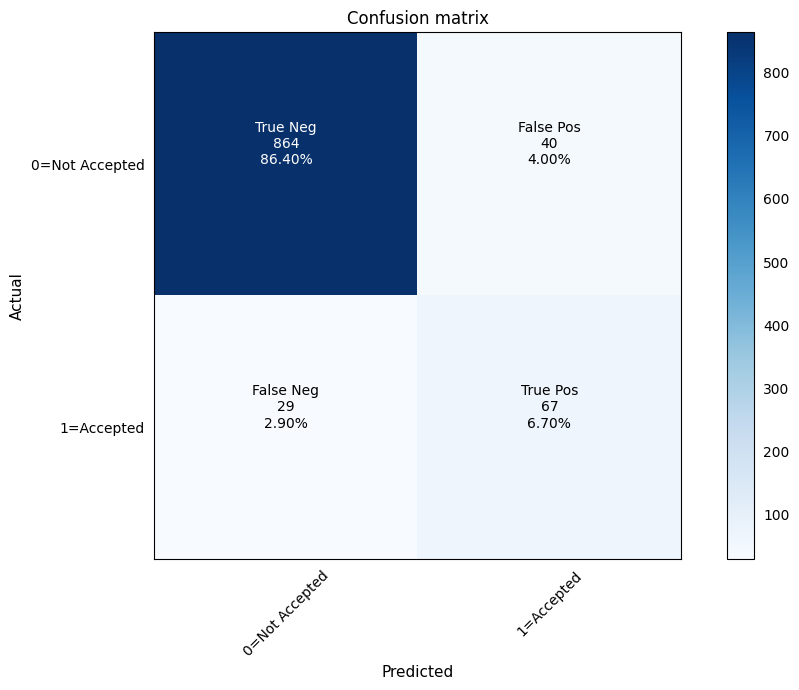

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       904
           1       0.63      0.70      0.66        96

    accuracy                           0.93      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.93      0.93      0.93      1000
 

Jaccard Score: 0.49264705882352944
Log loss: 2.4870120838490832 



In [59]:
# create initial model with CategoricalNB
acc_test_2_1, acc_train_2_1, rec_test_2_1, rec_train_2_1 = modeling(
    clf=pipe2,
    x=x2,
    y=y2,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='CategoricalNB 1',
    stratify=True)

In [60]:
print(f"Recall train: {rec_train_2_1}")
print(f"Recall test: {rec_test_2_1}")

Recall train: 0.6822916666666666
Recall test: 0.6979166666666666


The accuracy and recall obtained is the same as we expected. To improve models, other test size values are also checked:

In [61]:
# check improve model by change test_size
change_test_size(pipe2, x2, y2, 'CategoricalNB')

In [62]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"CategoricalNB", '0.2', acc_test_2_1, rec_test_2_1]
best_model_train.loc[len(best_model_train.index)] = [f"CategoricalNB", '0.2', acc_train_2_1, rec_train_2_1]

# ComplementNB( )

In [63]:
# Check cross validation on Complement model to estimate model performance (Accuracy)
pipe3 = Pipeline([('clf', ComplementNB())])
Perform_cross_val(pipe3, k=10, x=x_train2, y=y_train2, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.87325
CV results: [0.8875 0.8525 0.9125 0.8675 0.86   0.8625 0.8775 0.8825 0.8725 0.8575]



In [64]:
# Check cross validation on Complement model to estimate model performance (Recall)
Perform_cross_val(pipe3, k=10, x=x_train2, y=y_train2, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.9089068825910932
CV results: [0.97368421 0.92105263 0.97368421 0.89473684 0.84210526 0.86842105
 0.8974359  0.8974359  0.92307692 0.8974359 ]



According to the obtained result, we expect our ComplementNB model to have an accuracy close to or greater than 0.87 and better recall. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 43)
y_train: (4000, 1)
x_test: (1000, 43)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[783 121]
 [  8  88]]


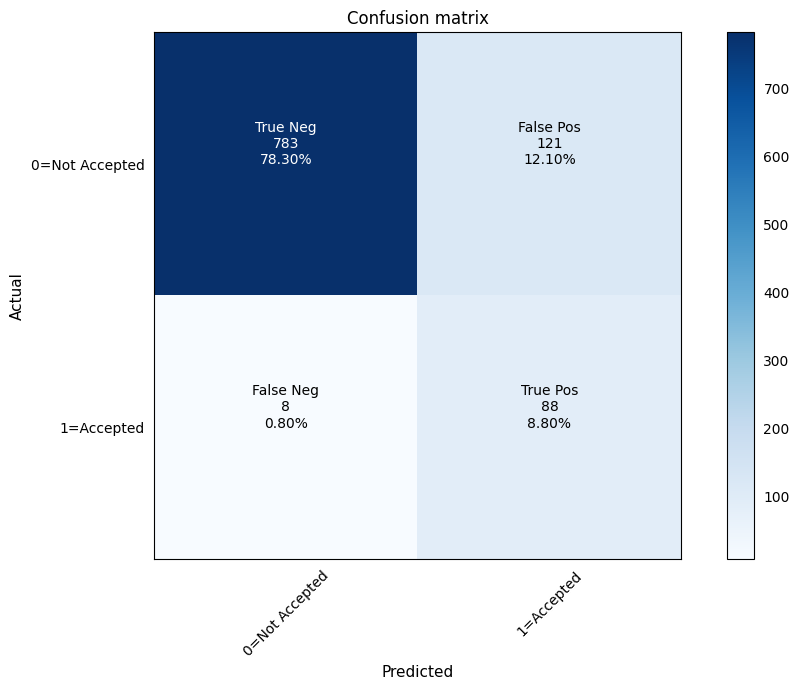

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       904
           1       0.42      0.92      0.58        96

    accuracy                           0.87      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.87      0.89      1000
 

Jaccard Score: 0.4055299539170507
Log loss: 4.6496312871961125 



In [65]:
# create initial model with ComplementlNB
acc_test_3_1, acc_train_3_1, rec_test_3_1, rec_train_3_1 = modeling(
    clf=pipe3,
    x=x2,
    y=y2,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='ComplementNB 1',
    stratify=True)

In [66]:
print(f"Recall train: {rec_train_3_1}")
print(f"Recall test: {rec_test_3_1}")

Recall train: 0.9166666666666666
Recall test: 0.9166666666666666


The accuracy obtained is almost the same as we expected, but overall the accuracy of the model has decreased and it is not as good as the multinomialNB model, but recall is important for us. To improve models, other test size values are also checked:

In [67]:
# check improve model by change test_size
change_test_size(pipe3, x2, y2, 'ComplementNB')

Despite the slight increase in the accuracy value, the recall value did not improve by changing the test size, so the initial ComplementNB model is better.

In [68]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"ComplementNB", '0.2', acc_test_3_1, rec_test_3_1]
best_model_train.loc[len(best_model_train.index)] = [f"ComplementNB", '0.2', acc_train_3_1, rec_train_3_1]

# BernoulliNB( )

In [69]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0, stratify=y2)

In [70]:
# Check cross validation on BernoulliNB model to estimate model performance (Accuracy)
pipe4 = Pipeline([('clf', BernoulliNB())])
Perform_cross_val(pipe4, k=10, x=x_train2, y=y_train2, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.932
CV results: [0.925  0.915  0.95   0.905  0.93   0.9375 0.9325 0.9325 0.9425 0.95  ]



In [71]:
# Check cross validation on BernoulliNB model to estimate model performance (Recall)
Perform_cross_val(pipe4, k=10, x=x_train2, y=y_train2, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6686909581646423
CV results: [0.5        0.68421053 0.73684211 0.60526316 0.60526316 0.65789474
 0.66666667 0.64102564 0.76923077 0.82051282]



According to the obtained result, we expect our BernoulliNB model to have an accuracy close to or greater than 0.93 and the recall value is lower than the complementNB model. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 43)
y_train: (4000, 1)
x_test: (1000, 43)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[864  40]
 [ 29  67]]


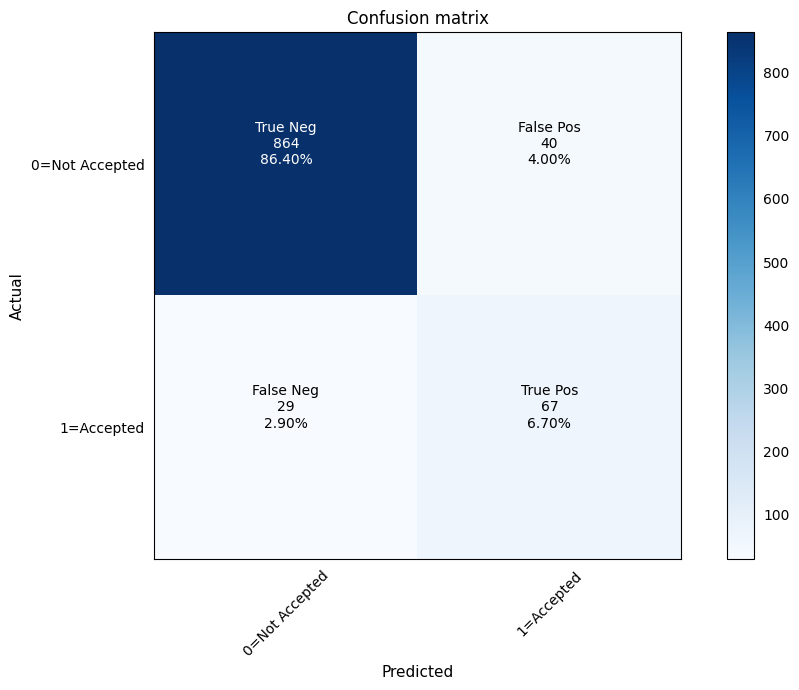

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       904
           1       0.63      0.70      0.66        96

    accuracy                           0.93      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.93      0.93      0.93      1000
 

Jaccard Score: 0.49264705882352944
Log loss: 2.4870120838490832 



In [72]:
# create initial model with BernoulliNB and test_size=0.2
acc_test_4_1, acc_train_4_1, rec_test_4_1, rec_train_4_1 = modeling(
    clf=pipe4,
    x=x2,
    y=y2,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='BernoulliNB 1',
    stratify=True)

In [73]:
print(f"Recall train: {rec_train_4_1}")
print(f"Recall test: {rec_test_4_1}")

Recall train: 0.6822916666666666
Recall test: 0.6979166666666666


The accuracy and recall obtained is the same as we expected. To improve models, other test size values are also checked:

In [74]:
# check imporve model by change test_size
change_test_size(pipe4, x2, y2, 'BernoulliNB')

In [75]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"BernoulliNB", '0.2', acc_test_4_1, rec_test_4_1]
best_model_train.loc[len(best_model_train.index)] = [f"BernoulliNB", '0.2', acc_train_4_1, rec_train_4_1]

# LogisitcRegression( )

In [76]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [77]:
# Check cross validation on LogisticRegression model to estimate model performance (Accuracy)
logreg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cg'))])
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9512499999999999
CV results: [0.9475 0.9525 0.9525 0.945  0.955  0.9525 0.9475 0.95   0.96   0.95  ]



In [78]:
# Check cross validation on LogisticRegression model to estimate model performance (Recall)
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6303643724696357
CV results: [0.60526316 0.63157895 0.68421053 0.63157895 0.68421053 0.60526316
 0.58974359 0.58974359 0.66666667 0.61538462]



According to the obtained result, we expect our LogisticRegression model to have an high accuracy so far close to or greater than 0.95 but its recall lower than previous model. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[892  12]
 [ 36  60]]


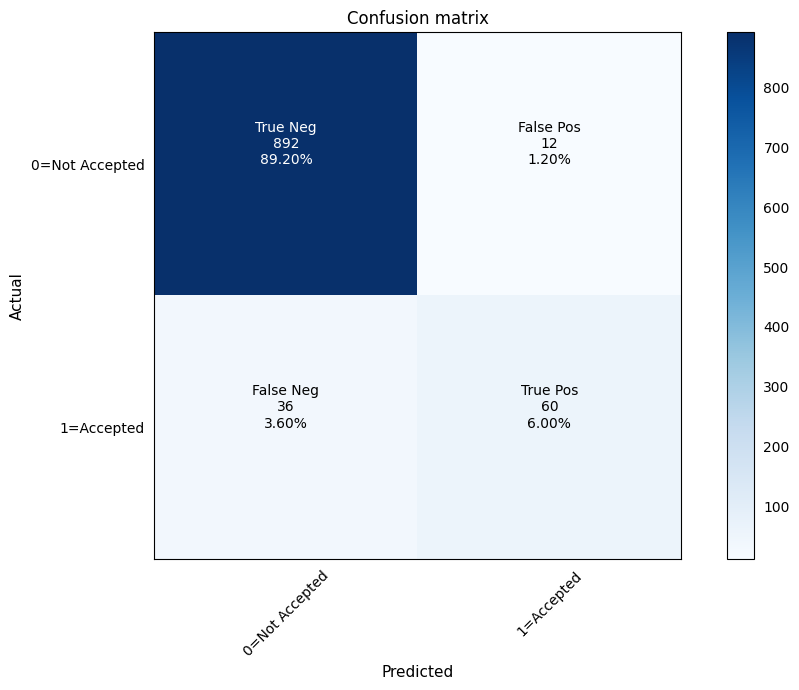

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5555555555555556
Log loss: 1.7300953626776236 



In [79]:
# create initial model with LogisticRegression and test_size=0.2
acc_test_5_1, acc_train_5_1, rec_test_5_1, rec_train_5_1 = modeling(
    clf=logreg,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 1',
    stratify=True)

In [80]:
print(f"Recall train: {rec_train_5_1}")
print(f"Recall test: {rec_test_5_1}")

Recall train: 0.6328125
Recall test: 0.625


In [81]:
# try to imporve model by changing test_size
pipe5_1 = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
change_test_size(pipe5_1, x, y, 'LogisticReg')

In [82]:
# find best parameters for Logistic Regression estimator
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler().fit(x_train)
x_norm_train = scaler.transform(x_train)
x_norm_test = scaler.transform(x_test)
grid_result = grid_search.fit(x_norm_train, y_train.ravel())
# summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.6251012145748989 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[892  12]
 [ 35  61]]


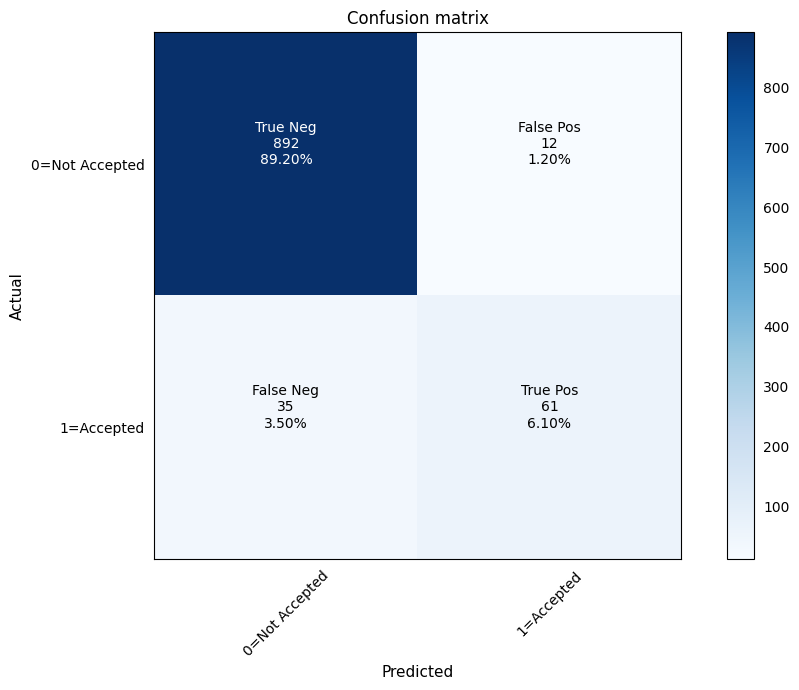

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5648148148148148
Log loss: 1.6940517092885063 



In [83]:
# create better LogisticRegression model
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=1, n_jobs=-1)
pipe5_2 = Pipeline([('scaler', StandardScaler()), ('clf', logreg2)])
acc_test_5_2, acc_train_5_2, rec_test_5_2, rec_train_5_2 = modeling(
    clf=pipe5_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 2',
    stratify=True)

In [84]:
print(f"Recall train: {rec_train_5_2}")
print(f"Recall test: {rec_test_5_2}")

Recall train: 0.6328125
Recall test: 0.6354166666666666


In [85]:
# check improve model by change test_size
change_test_size(pipe5_2, x, y, 'LogisticReg')

In [86]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"LogisticReg", '0.2', acc_test_5_2, rec_test_5_2]
best_model_train.loc[len(best_model_train.index)] = [f"LogisticReg", '0.2', acc_train_5_2, rec_train_5_2]

## KNN: KNeighborsClassifier( )

In [87]:
def knn_model(x, y, Ks, test_size, show_plot=1, stratify=True):
    """fit knn algorithm, predict x_test and draw plots if you want

        x (DataFrame or array): features
        y (DataFrame or array): target
        test_size (float): parameter that use for split data to train and test set
        show_plot (1 or any): for draw plots

        Retrun Accuracy_train and Accuracy_test"""

    # split dataset
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    print('-'*20, 'Shape', '-'*20)
    print ('Train set:', x_train.shape,  y_train.shape)
    print ('Test set:', x_test.shape,  y_test.shape, '\n')

    # initial values and constants
    Ks = Ks
    ACC_train = np.zeros((Ks))
    ACC_test = np.zeros((Ks))
    REC_train = np.zeros((Ks))
    REC_test = np.zeros((Ks))

    # for loop for find best k
    for k in range(1,Ks+1):
        # train model and predict
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors=k))])
        pipe.fit(x_train, y_train.ravel())
        y_pred_train = pipe.predict(x_train)
        y_pred_test = pipe.predict(x_test)
        ACC_train[k-1] = accuracy_score(y_train, y_pred_train)
        ACC_test[k-1] = accuracy_score(y_test, y_pred_test)
        REC_train[k-1] = recall_score(y_train, y_pred_train)
        REC_test[k-1] = recall_score(y_test, y_pred_test)

    # draw plots
    if show_plot == 1:
        x = list(range(1,Ks+1))
        x_rev = x[::-1]

        # Train Accuracy line
        y1 = ACC_train
        # Test Accuracy line
        y2 = ACC_test
        # Train Recall line
        y3 = REC_train
        # Test Recall line
        y4 = REC_test

        fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "Recall"))

        # Train Accuracy plot (in 1st subplot)
        fig.add_trace(go.Scatter(
            x=x, y=y1,
            line_color='rgb(0,100,80)',
            name='Train Accuracy',
        ), row=1, col=1)

        # Test Accuracy plot (in 1st subplot)
        fig.add_trace(go.Scatter(
            x=x, y=y2,
            line_color='rgb(255,140,0)',
            name='Test Accuracy',
        ), row=1, col=1)

# ----------------------------------------------------------------------------------------------------

        # # Train Recall plot (in 2nd subplot)
        fig.add_trace(go.Scatter(
            x=x, y=y3,
            line_color='rgb(212, 31, 13)',
            name='Train Recall',
        ), row=1, col=2)

        # Test Recall plot (in 2nd subplot)
        fig.add_trace(go.Scatter(
            x=x, y=y4,
            line_color='rgb(13, 109, 212)',
            name='Test Recall',
        ), row=1, col=2)

        # Update xaxis properties
        fig.update_xaxes(title_text="Number of Neighbors (k)", row=1, col=1)
        fig.update_xaxes(title_text="Number of Neighbors (k)", row=1, col=2)

        # Update yaxis properties
        fig.update_yaxes(title_text="Accuracy", row=1, col=1)
        fig.update_yaxes(title_text="Recall", row=1, col=2)

        fig.update_traces(mode='lines')
        fig.update_layout(title_text="Accuracy and Recall of KNN models for all k")
        fig.show()

    # print results
    print( f"The best train accuracy was {ACC_train.max()} with {ACC_train.argmax()+1}")
    print( f"The best test accuracy was {ACC_test.max()} with {ACC_test.argmax()+1}")
    print( f"The best train recall was {REC_train.max()} with {REC_train.argmax()+1}")
    print( f"The best test recall was {REC_test.max()} with {REC_test.argmax()+1}")

    return  ACC_test, ACC_train, REC_test, REC_train

In [88]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [89]:
# Check cross validation on KNN model to estimate model performance (Accuracy)
operations = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipe6_1 = Pipeline(operations)
Perform_cross_val(pipe6_1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9574999999999999
CV results: [0.9425 0.965  0.9675 0.955  0.9575 0.96   0.965  0.95   0.955  0.9575]



In [90]:
# Check cross validation on KNN model to estimate model performance (Recall)
Perform_cross_val(pipe6_1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.5988529014844804
CV results: [0.44736842 0.63157895 0.68421053 0.60526316 0.60526316 0.57894737
 0.66666667 0.56410256 0.58974359 0.61538462]



According to the obtained result, we expect our KNN model to have an accuracy close to or greater than 0.957. Let's check it:

In [91]:
# find best k for knn model
acc_test_6_1, acc_train_6_1, rec_test_6_1, rec_train_6_1 = knn_model(x, y, 30, 0.2, show_plot=1, stratify=True)

-------------------- Shape --------------------
Train set: (4000, 11) (4000, 1)
Test set: (1000, 11) (1000, 1) 



The best train accuracy was 1.0 with 1
The best test accuracy was 0.968 with 3
The best train recall was 1.0 with 1
The best test recall was 0.7395833333333334 with 1


In [92]:
# check improve model by change test_size
change_test_size(pipe6_1, x, y, 'KNN')

The best value of k for the accuracy of the model is 3, but recall is important for us and for this, k is 1, but this value, as is known, causes the model to overfit. The best k for recall that performs best after k=1 and does not cause the model to overfit is k=3. (Because it is a classification problem, it is better to use even k)

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[899   5]
 [ 27  69]]


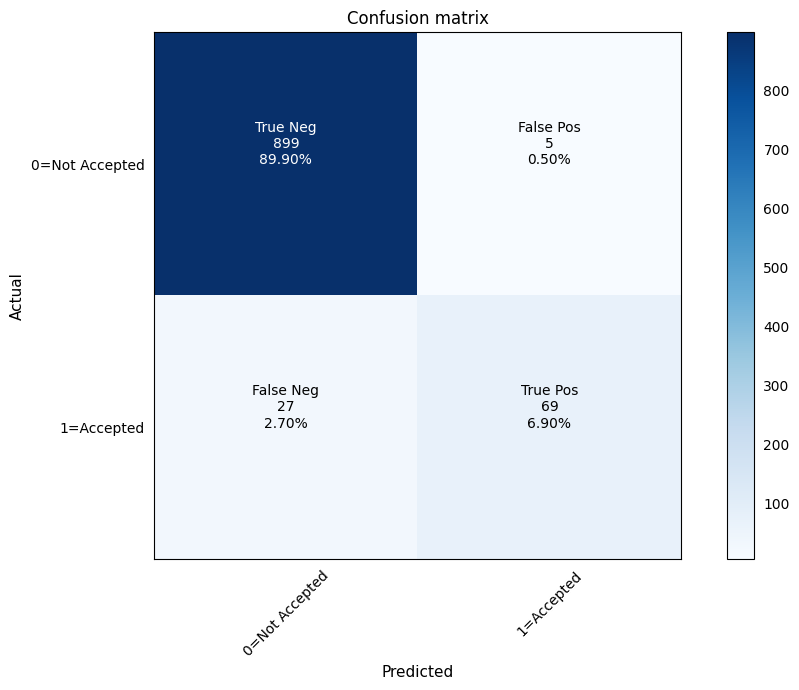

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.93      0.72      0.81        96

    accuracy                           0.97      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.97      0.97      0.97      1000
 

Jaccard Score: 0.6831683168316832
Log loss: 1.1533969084517488 



In [93]:
# create better model on KNN algorithm by k=3
knn = KNeighborsClassifier(n_neighbors=3)
pipe6_2 = Pipeline([('scaler', StandardScaler()), ('clf', knn)])
acc_test_6_1, acc_train_6_1, rec_test_6_1, rec_train_6_1 = modeling(
    clf=pipe6_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='KNN1',
    stratify=True)

In [94]:
print(f"Recall train: {rec_train_6_1}")
print(f"Recall test: {rec_test_6_1}")

Recall train: 0.78125
Recall test: 0.71875


In [95]:
# knn parameter tuning with gridsearch
kValues = list(range(3, 31, 2))
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1,2]
param_grid = dict(knn__n_neighbors=kValues, knn__weights=weights, knn__algorithm=algorithm, knn__p=p)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
classifier = GridSearchCV(pipe6_1, param_grid, cv=10, scoring='recall')
classifier.fit(x_train, y_train.ravel())

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 29],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

In [96]:
results1 = classifier.best_estimator_.get_params()
df_results1 = pd.DataFrame(results1).T.rename(columns={0: "Values1", 1: "Values2"})
df_results1

Values1  \
memory                                                           None   
steps                                      (scaler, StandardScaler())   
verbose                                                         False   
scaler                                               StandardScaler()   
knn                 KNeighborsClassifier(n_neighbors=3, weights='d...   
scaler__copy                                                     True   
scaler__with_mean                                                True   
scaler__with_std                                                 True   
knn__algorithm                                                   auto   
knn__leaf_size                                                     30   
knn__metric                                                 minkowski   
knn__metric_params                                               None   
knn__n_jobs                                                      None   
knn__n_neighbors                                                    3   
knn__p                                                              2   
knn__weights                                                 distance   

                                                              Values2  
memory                                                           None  
steps               (knn, KNeighborsClassifier(n_neighbors=3, weig...  
verbose                                                         False  
scaler                                               StandardScaler()  
knn                 KNeighborsClassifier(n_neighbors=3, weights='d...  
scaler__copy                                                     True  
scaler__with_mean                                                True  
scaler__with_std                                                 True  
knn__algorithm                                                   auto  
knn__leaf_size                                                     30  
knn__metric                                                 minkowski  
knn__metric_params                                               None  
knn__n_jobs                                                      None  
knn__n_neighbors                                                    3  
knn__p                                                              2  
knn__weights                                                 distance

In [97]:
df_results2 = pd.DataFrame(classifier.cv_results_)
df_results2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.012330      0.003018         0.057324        0.011519   
1         0.014042      0.001161         0.042228        0.003463   
2         0.014224      0.000972         0.058066        0.003313   
3         0.014564      0.001558         0.030970        0.001924   
4         0.014229      0.000952         0.076589        0.003835   
..             ...           ...              ...             ...   
219       0.005723      0.000738         0.017555        0.002172   
220       0.005229      0.000113         0.053654        0.001243   
221       0.005561      0.000982         0.037397        0.001518   
222       0.005293      0.000087         0.034384        0.001199   
223       0.005108      0.000078         0.016892        0.000642   

    param_knn__algorithm param_knn__n_neighbors param_knn__p  \
0                   auto                      3            1   
1                   auto                      3            1   
2                   auto                      3            2   
3                   auto                      3            2   
4                   auto                      5            1   
..                   ...                    ...          ...   
219                brute                     27            2   
220                brute                     29            1   
221                brute                     29            1   
222                brute                     29            2   
223                brute                     29            2   

    param_knn__weights                                             params  \
0              uniform  {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
1             distance  {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
2              uniform  {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
3             distance  {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
4              uniform  {'knn__algorithm': 'auto', 'knn__n_neighbors':...   
..                 ...                                                ...   
219           distance  {'knn__algorithm': 'brute', 'knn__n_neighbors'...   
220            uniform  {'knn__algorithm': 'brute', 'knn__n_neighbors'...   
221           distance  {'knn__algorithm': 'brute', 'knn__n_neighbors'...   
222            uniform  {'knn__algorithm': 'brute', 'knn__n_neighbors'...   
223           distance  {'knn__algorithm': 'brute', 'knn__n_neighbors'...   

     split0_test_score  ...  split3_test_score  split4_test_score  \
0             0.473684  ...           0.684211           0.605263   
1             0.473684  ...           0.684211           0.605263   
2             0.578947  ...           0.684211           0.631579   
3             0.578947  ...           0.684211           0.631579   
4             0.394737  ...           0.631579           0.552632   
..                 ...  ...                ...                ...   
219           0.263158  ...           0.473684           0.447368   
220           0.236842  ...           0.394737           0.315789   
221           0.263158  ...           0.421053           0.394737   
222           0.236842  ...           0.447368           0.394737   
223           0.263158  ...           0.473684           0.447368   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.578947           0.641026           0.589744   
1             0.578947           0.641026           0.589744   
2             0.578947           0.692308           0.615385   
3             0.578947           0.692308           0.615385   
4             0.526316           0.615385           0.538462   
..                 ...                ...                ...   
219           0.421053           0.487179           0.461538   
220           0.368421           0.487179           0.461538   
221           0.421053           0.512821           0.461538   
222          

In the above tables, the best model is a model with n_neighbors = 3, P = 2, algorithm = auto and weights = distance that is a default model.

In [98]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"KNN (k=3)", '0.2', acc_test_6_1, rec_test_6_1]
best_model_train.loc[len(best_model_train.index)] = [f"KNN (k=3)", '0.2', acc_train_6_1, rec_train_6_1]

# Decision Tree

In [99]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [100]:
# Check cross validation on DT model to estimate model performance (Accuracy)
operations = [('DTs', DecisionTreeClassifier(max_depth=3))]
pipe7_1 = Pipeline(operations)
Perform_cross_val(pipe7_1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9814999999999999
CV results: [0.9725 0.9875 0.9775 0.9825 0.98   0.9775 0.985  0.9825 0.985  0.985 ]



In [101]:
# Check cross validation on DT model to estimate model performance (Recall)
Perform_cross_val(pipe7_1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.8383265856950066
CV results: [0.78947368 0.86842105 0.84210526 0.86842105 0.78947368 0.78947368
 0.87179487 0.82051282 0.84615385 0.8974359 ]



Based on the results obtained above, we expect the model to have an accuracy of around 98% and its recall to be high. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[900   4]
 [ 10  86]]


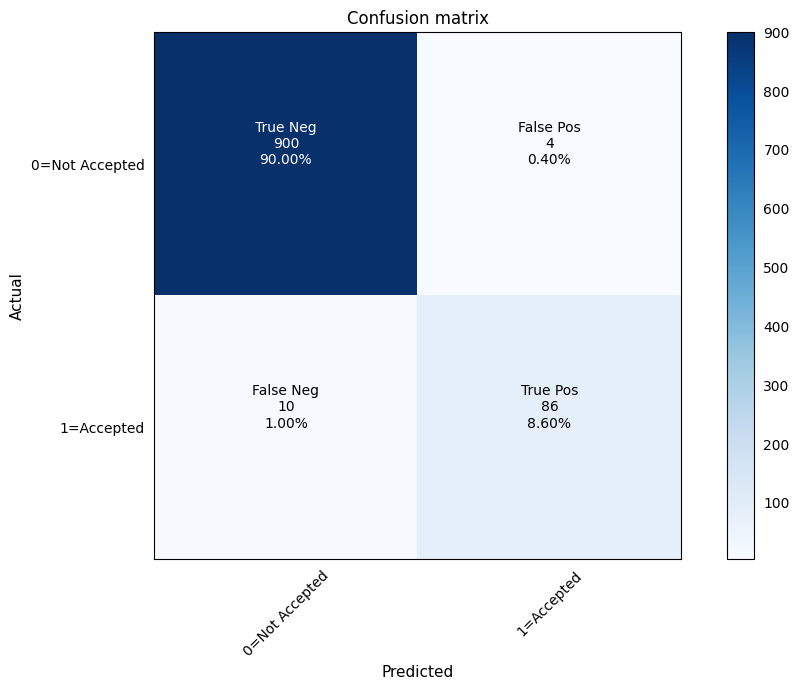

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.90      0.92        96

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.86
Log loss: 0.5046111474476404 



In [102]:
# create initial DTs model without pruning
dts = DecisionTreeClassifier(random_state=0)
pipe7_1 = Pipeline([('scaler', StandardScaler()), ('clf', dts)])
acc_test_7_1, acc_train_7_1, rec_test_7_1, rec_train_7_1 = modeling(
    clf=pipe7_1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='DT 1',
    stratify=True)

In [103]:
print(f"Train Accuracy: {acc_train_7_1}")
print(f"Test Accuracy: {acc_test_7_1}")
print(f"Train Recall: {rec_train_7_1}")
print(f"Test Recall: {rec_test_7_1}")

Train Accuracy: 1.0
Test Accuracy: 0.986
Train Recall: 1.0
Test Recall: 0.8958333333333334


In [104]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train.ravel())
y_train_predicted=clf.predict(x_train)
y_test_predicted=clf.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train,y_train_predicted)}")
print(f"Test Accuracy: {accuracy_score(y_test,y_test_predicted)}")
print(f"Train Recall: {recall_score(y_train,y_train_predicted)}")
print(f"Test Recall: {recall_score(y_test,y_test_predicted)}")

Train Accuracy: 1.0
Test Accuracy: 0.986
Train Recall: 1.0
Test Recall: 0.8958333333333334


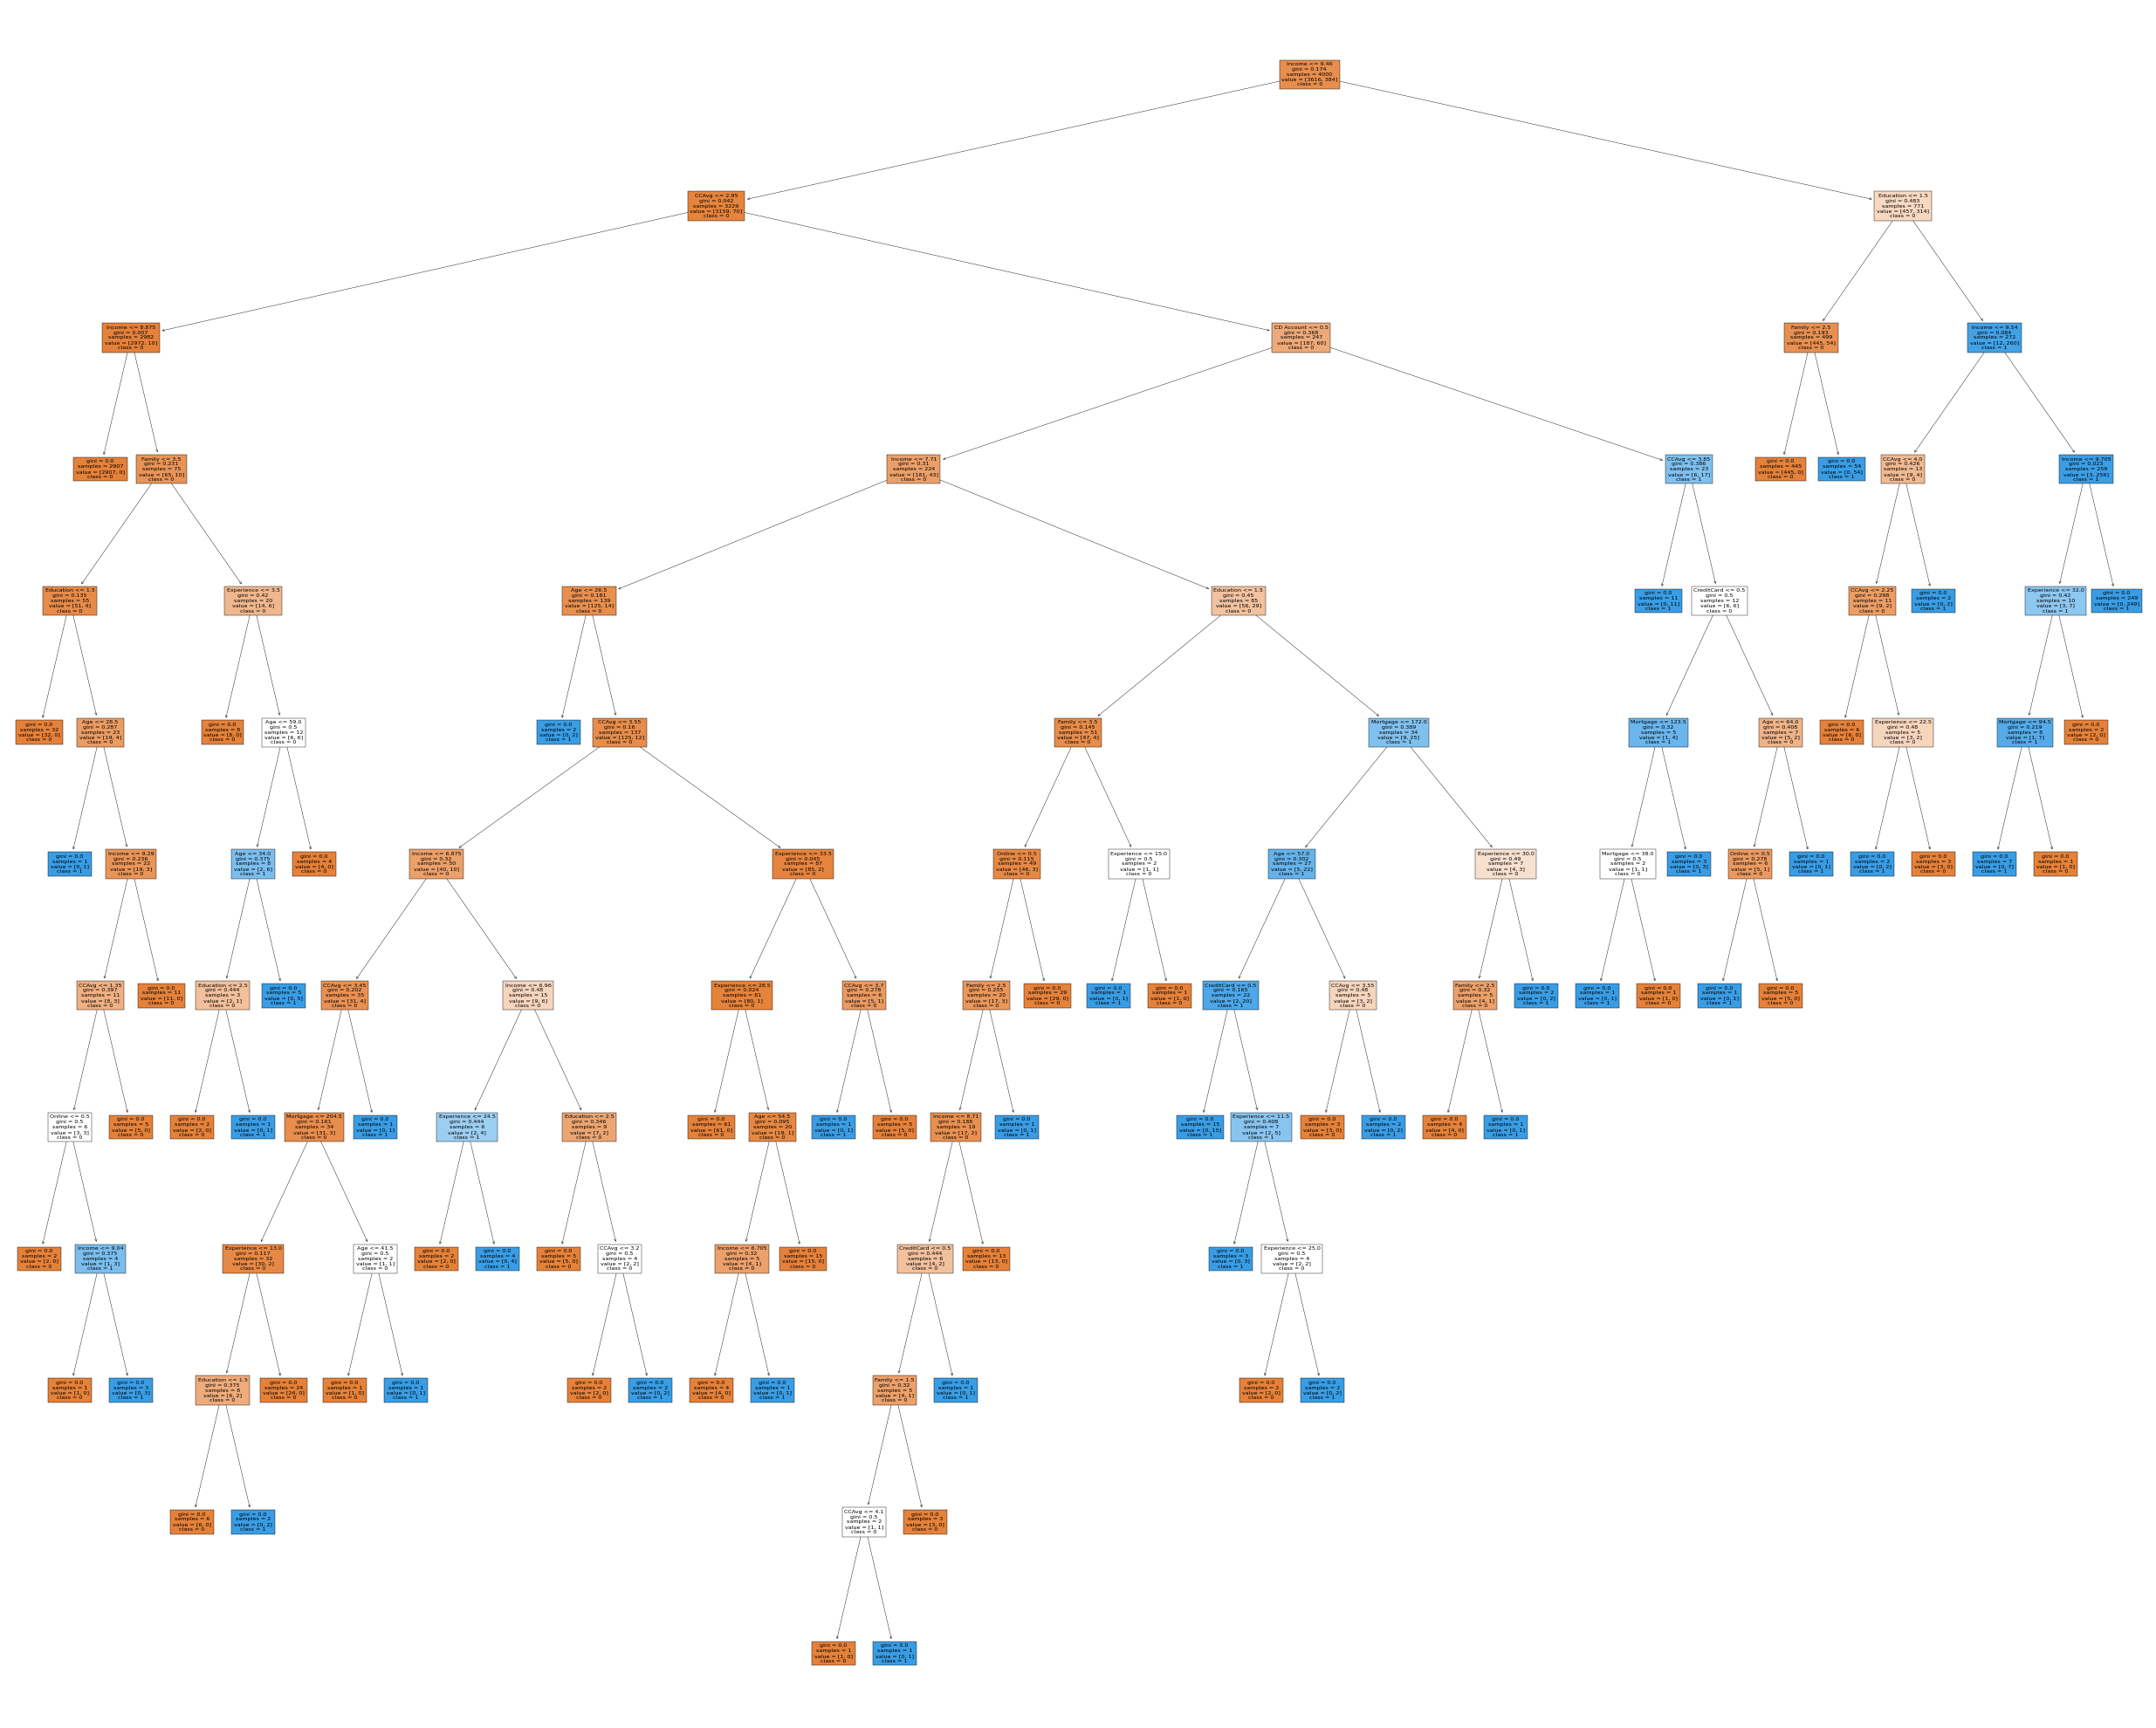

In [105]:
# visualizing tree
from sklearn import tree
feature_names = x.columns
target_names = ['0', '1']
fig = plt.figure(figsize=(25,20))
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(x_train,y_train.ravel())
plot = tree.plot_tree(
    dt1,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

According to the obtained result, our model is overfitting and our tree has many rules. This is a common problem in decision trees. To solve this problem, we use pruning techniques

In [106]:
# Grid of parameters to choose from
grid_param={"criterion":["gini","entropy"],
             "max_depth":range(2,10,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1)
            }
cv = StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(estimator=dt1,param_grid=grid_param,cv=cv,n_jobs=-1)
grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [107]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [108]:
dt2=DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=14,
    min_samples_split=2,
    splitter='random'
    )
dt2.fit(x_train,y_train.ravel())
plt.figure(figsize=(20,12), dpi=1000)
plot = tree.plot_tree(
    dt2,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [109]:
# check Accuracy, Recanll and overfitting
y_predicted_train= dt2.predict(x_train)
y_predicted_test = dt2.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train, y_predicted_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Train Recall: {recall_score(y_train, y_predicted_train)}")
print(f"Test Recall: {recall_score(y_test, y_predicted_test)}")

Train Accuracy: 0.958
Test Accuracy: 0.958
Train Recall: 0.5625
Test Recall: 0.5625


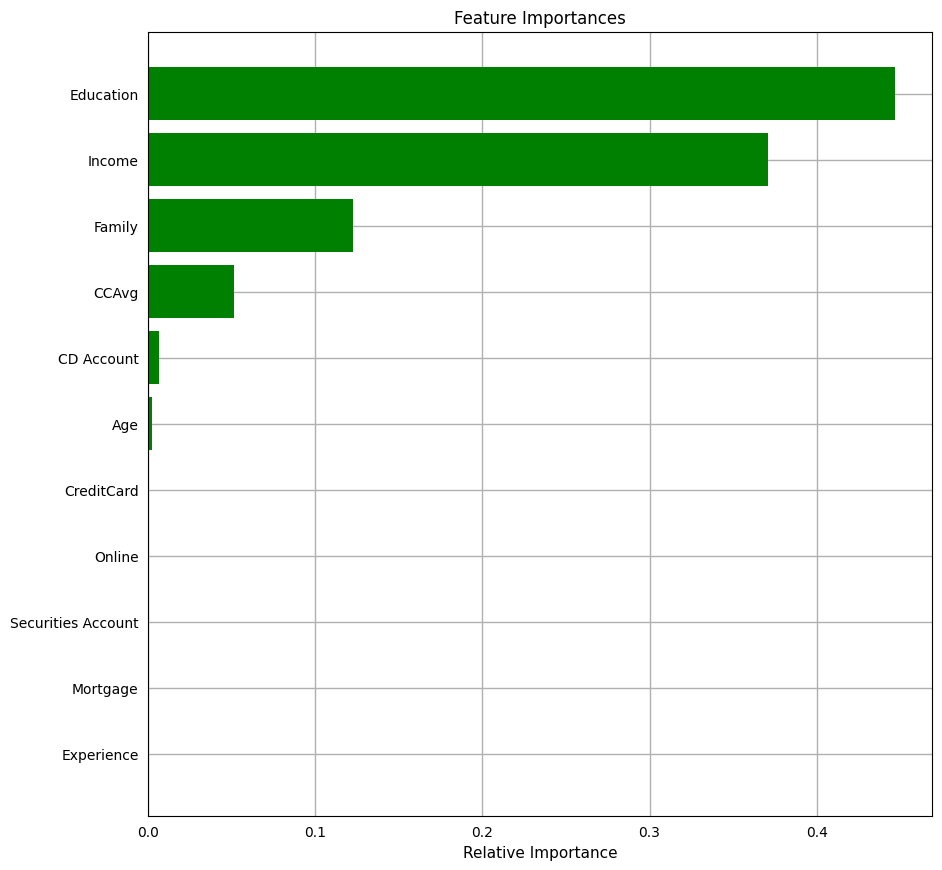

In [110]:
importances = dt2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

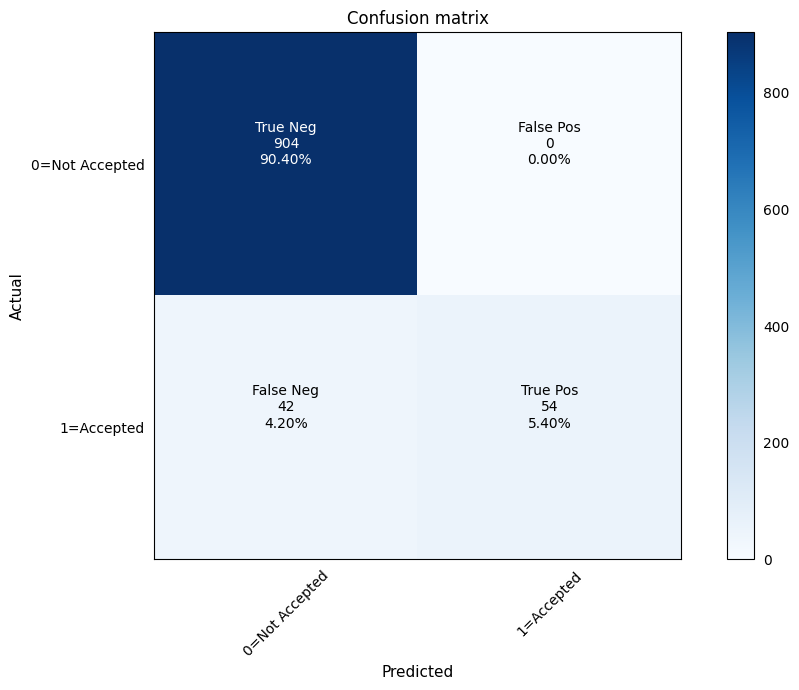

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       904
           1       1.00      0.56      0.72        96

    accuracy                           0.96      1000
   macro avg       0.98      0.78      0.85      1000
weighted avg       0.96      0.96      0.95      1000



In [111]:
cm = confusion_matrix(y_test, y_predicted_test)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
print(classification_report(y_test, y_predicted_test))

- According to the figure above, as seen in the EDA section, the two features Education and Income have the most effect and importance.

- Important feature is Education, Income, Family, CCAvg, Securities Account, Online, Personal Loan

- Obtained recall is good ذut the model still incorrectly predicted 18 people who accepted the loan. Let's see if this value can be reduced or not:

Now we use post-pruning:

In [112]:
path = dt1.cost_complexity_pruning_path(x_train, y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("\n")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00016461 0.0002     0.0002     0.00024052 0.00024159
 0.00025    0.00030303 0.00030909 0.00033333 0.00035714 0.00037255
 0.00038571 0.00038889 0.0004     0.00040378 0.00040909 0.00041667
 0.0004375  0.00045714 0.0004836  0.00049744 0.0005142  0.00052256
 0.00056643 0.00057626 0.0006499  0.00071739 0.00082051 0.00286805
 0.00296292 0.00312239 0.00654547 0.02407816 0.05475665]


Impurities in Decision Tree : [0.         0.00049383 0.00089383 0.00129383 0.00273696 0.00322015
 0.00347015 0.00437924 0.00623379 0.00656712 0.0072814  0.00839905
 0.00878477 0.00956254 0.00996254 0.01036632 0.01118451 0.01160117
 0.01203867 0.01249582 0.01394661 0.01444405 0.01598664 0.01703177
 0.0175982  0.01932699 0.01997689 0.02069428 0.02151479 0.02438284
 0.03030869 0.03343108 0.03997655 0.0640547  0.173568  ]


In [113]:
# train a decision tree using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train.ravel())
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.054756649204188663


In [114]:
# Visualizing the Recall score for train and test set:

train_scores = [recall_score(y_train, clf.predict(x_train)) for clf in clfs]
test_scores = [recall_score(y_test, clf.predict(x_test)) for clf in clfs]

fig = go.Figure()
fig.add_trace(go.Scatter(x=ccp_alphas, y=train_scores, name='Train Recall', mode='lines+markers', line={"shape": 'hv'}))
fig.add_trace(go.Scatter(x=ccp_alphas, y=test_scores, name='Test Recall', mode='lines+markers', line={"shape": 'hv'}))
fig.update_layout(
    xaxis_title='ccp_alphas',
    yaxis_title='Recall',
    title='Recall vs alpha for training and testing sets',
    template='seaborn')
fig.show()

Best result that is not tend to overfit will obtain by ccp_alpha = 0.002868053

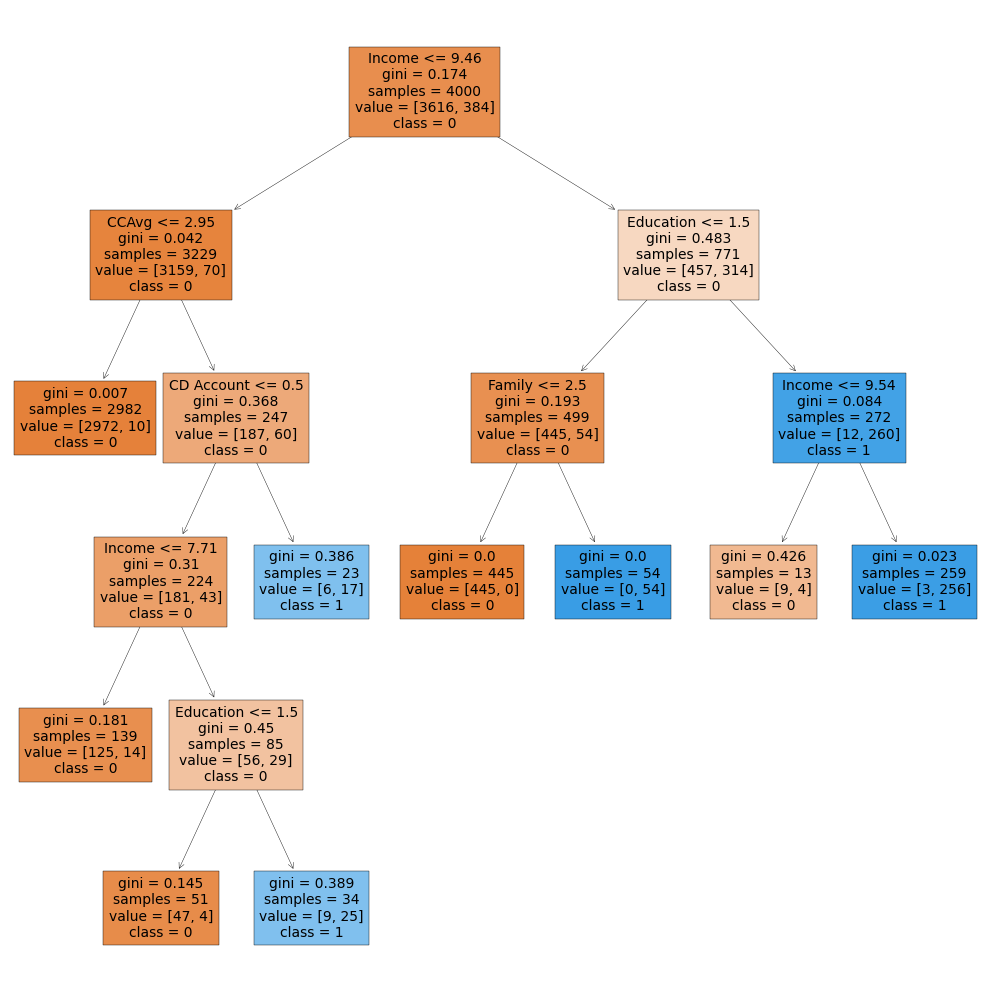

In [115]:
# create better Decision Tree (Post_pruning)
dt3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.002868053)
dt3.fit(x_train,y_train.ravel())
fig = plt.figure(figsize=(10,10), dpi=100)
plot = tree.plot_tree(
    dt3,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

# for save tree plot
# fig.savefig('Tree.png')
plt.show()

In [116]:
# for save decsition tree threshold in file
# text_representation = tree.export_text(dt3)
# with open( "decision_tree.log", "w") as file:
#     file.write(text_representation)

In [117]:
# print results for check overfit
y_predicted_train= dt3.predict(x_train)
y_predicted_test = dt3.predict(x_test)
print(f"Train Accuracy: {accuracy_score(y_train, y_predicted_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predicted_test)}")
print(f"Train Recall: {recall_score(y_train, y_predicted_train)}")
print(f"Test Recall: {recall_score(y_test, y_predicted_test)}")

Train Accuracy: 0.9875
Test Accuracy: 0.985
Train Recall: 0.9166666666666666
Test Recall: 0.9166666666666666


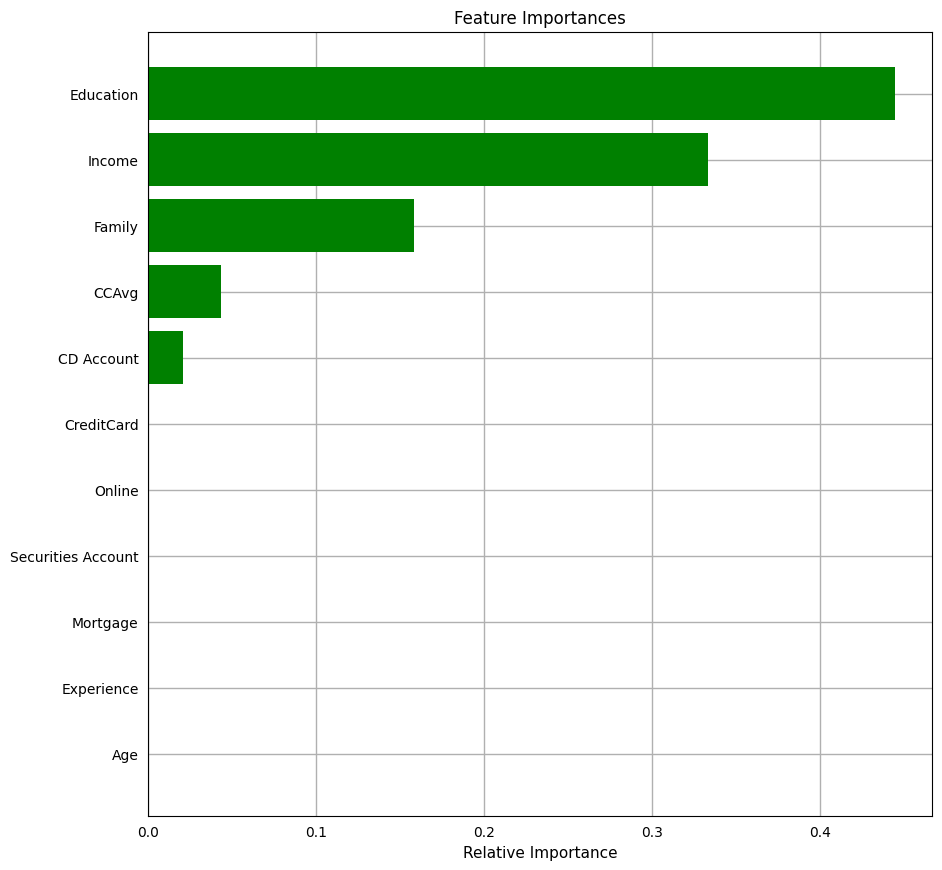

In [118]:
# find important features
importances = dt3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[897   7]
 [  8  88]]


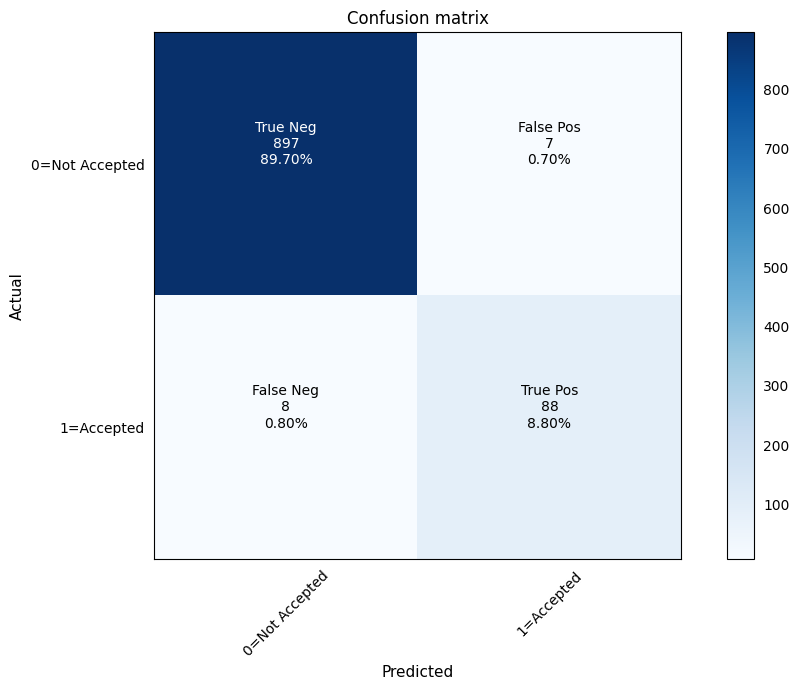

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.93      0.92      0.92        96

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000
 

Jaccard Score: 0.8543689320388349
Log loss: 0.5406548008367574 



In [119]:
# create better DTs model and draw plots
pipe7_2 = Pipeline([('scaler', StandardScaler()), ('clf', dt3)])
acc_test_7_2, acc_train_7_2, rec_test_7_2, rec_train_7_2 = modeling(
    clf=pipe7_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='DT 2',
    stratify=True)

Nice result  !!!

This Decision tree model that obtained by post pruning has given us best recall scores on data with 91.7% accuracy.

We obtained very good result that is not overfit and the model has wrongly predicted only 8 people who accepted the loan

In [120]:
# check improve model by change test_size
change_test_size(pipe7_2, x, y, 'DT')

In [121]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"Decision Tree", '0.2', acc_test_7_2, rec_test_7_2]
best_model_train.loc[len(best_model_train.index)] = [f"Decision Tree", '0.2', acc_train_7_2, rec_train_7_2]

# Random Forest

In [122]:
# split train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [123]:
# Check cross validation on Random Forest model to estimate model performance (Accuracy)
operations = [('RF', RandomForestClassifier())]
pipe8_1 = Pipeline(operations)
Perform_cross_val(pipe8_1, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.98575
CV results: [0.9825 0.99   0.9925 0.985  0.9875 0.97   0.99   0.98   0.9875 0.9925]



In [124]:
# Check cross validation on RandomForest model to estimate model performance (Recall)
Perform_cross_val(pipe8_1, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.8722672064777328
CV results: [0.81578947 0.92105263 0.92105263 0.86842105 0.86842105 0.78947368
 0.92307692 0.82051282 0.87179487 0.92307692]



-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[902   2]
 [  6  90]]


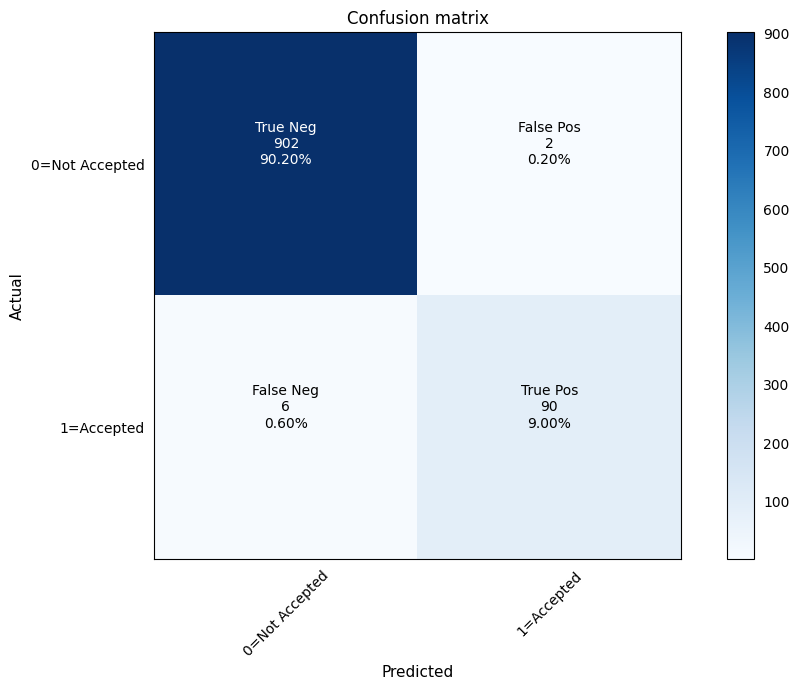

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.94      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.9183673469387755
Log loss: 0.2883492271129375 



In [125]:
# create initial RF model without pruning
rf = RandomForestClassifier()
pipe8_1 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_1, acc_train_8_1, rec_test_8_1, rec_train_8_1 = modeling(
    clf=pipe8_1,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 1',
    stratify=True)

In [126]:
# check accuracy, recall and overfitting
print(f"Train Accuracy: {acc_train_8_1}")
print(f"Test Accuracy: {acc_test_8_1}")
print(f"Train Recall: {rec_train_8_1}")
print(f"Test Recall: {rec_test_8_1}")

Train Accuracy: 1.0
Test Accuracy: 0.992
Train Recall: 1.0
Test Recall: 0.9375


It seems that the model tends to overfit here as well, so to solve this problem, we perform parameter tuning for RF:

Explore random forest bootstrap sample size
>0.1, mean:0.764, ste:0.053
>0.2, mean:0.828, ste:0.054
>0.3, mean:0.842, ste:0.052
>0.4, mean:0.859, ste:0.048
>0.5, mean:0.868, ste:0.048
>0.6, mean:0.872, ste:0.046
>0.7, mean:0.877, ste:0.047
>0.8, mean:0.874, ste:0.044
>0.9, mean:0.882, ste:0.043
>1.0, mean:0.883, ste:0.045


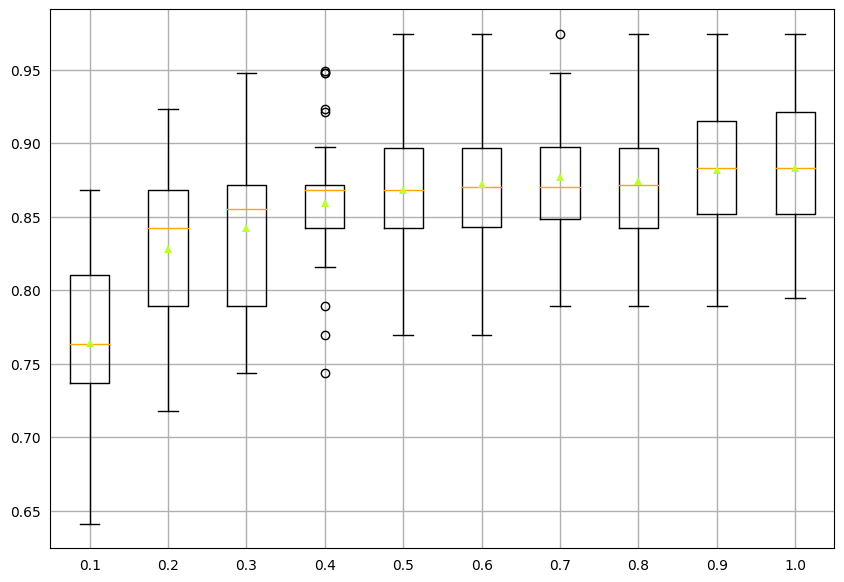

Explore random forest number of features effect
>1, mean:0.794, ste:0.047
>2, mean:0.858, ste:0.044
>3, mean:0.887, ste:0.044
>4, mean:0.891, ste:0.043
>5, mean:0.897, ste:0.039
>6, mean:0.896, ste:0.039
>7, mean:0.901, ste:0.038


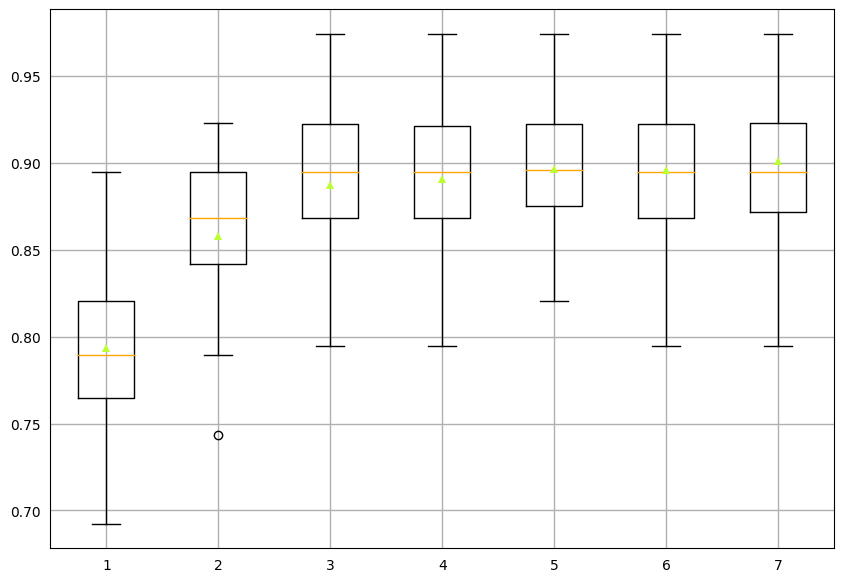

Explore random forest tree depth effect
>1, mean:0.000, ste:0.000
>2, mean:0.118, ste:0.066
>3, mean:0.454, ste:0.103
>4, mean:0.652, ste:0.075
>5, mean:0.799, ste:0.057
>6, mean:0.843, ste:0.058
>7, mean:0.864, ste:0.053
>8, mean:0.872, ste:0.045
>9, mean:0.873, ste:0.046
>None, mean:0.882, ste:0.048


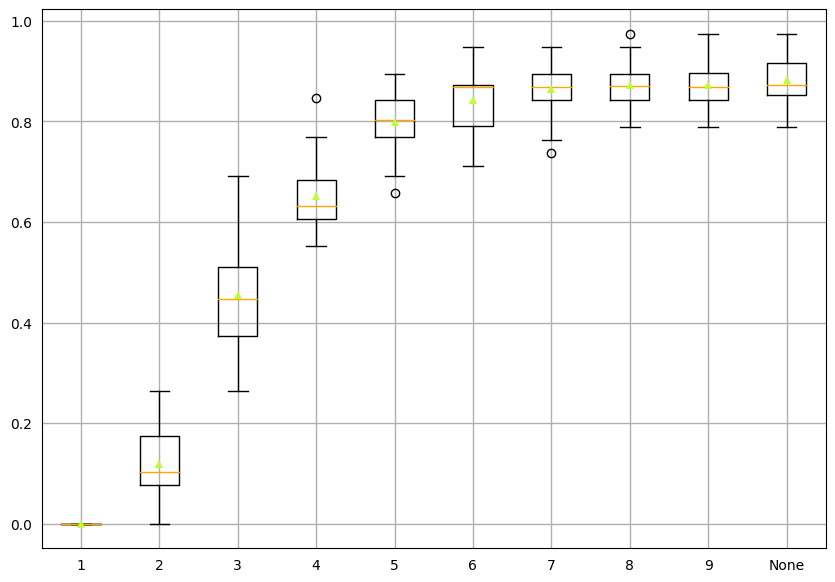

In [127]:
# parameter tuning by loops instead grid search because
# gridsearch is very expensive and Time-consuming for this dataset
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate
# explore random forest bootstrap sample size
def get_models1():
	print("Explore random forest bootstrap sample size")
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = f'{i:.1f}'
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# get a list of models to evaluate
# explore random forest number of features effect
def get_models2():
	print("Explore random forest number of features effect")
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# get a list of models to evaluate
# explore random forest tree depth effect
def get_models3():
	print("Explore random forest tree depth effect")
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,10)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
	return scores

for func in [get_models1, get_models2, get_models3]:
	# get the models to evaluate
	models = func()
	# evaluate the models and store results
	results, names = list(), list()
	for name, model in models.items():
		# evaluate the model
		scores = evaluate_model(model, x_train, y_train)
		# store the results
		results.append(scores)
		names.append(name)
		# summarize the performance along the way
		print(f">{name:s}, mean:{mean(scores):.3f}, ste:{std(scores):.3f}")
	# plot model performance for comparison
	plt.boxplot(results, labels=names, showmeans=True)
	plt.show()

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[901   3]
 [  9  87]]


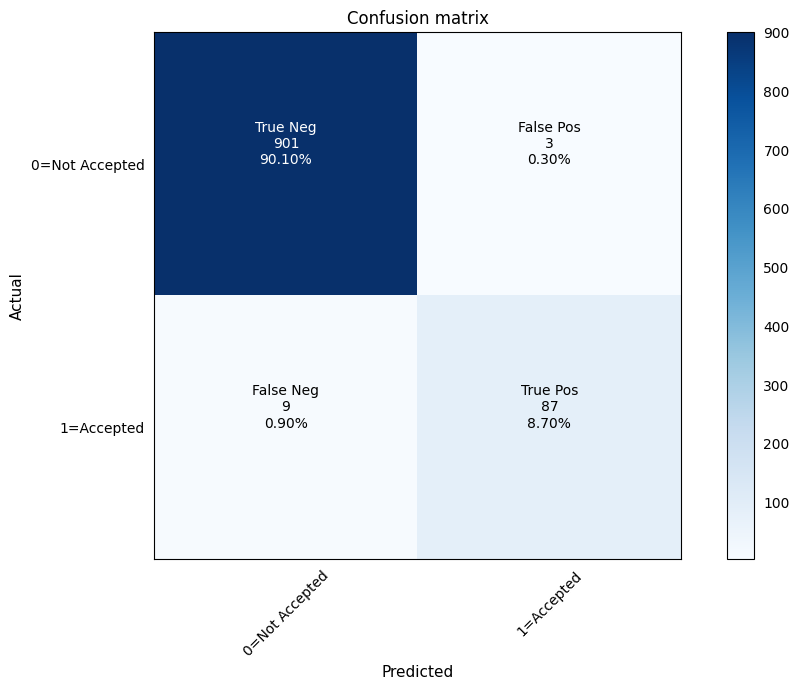

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.91      0.94        96

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000
 

Jaccard Score: 0.8787878787878788
Log loss: 0.432523840669406 



In [128]:
# create initial RF model without pruning
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_samples=None,
    max_features=7,
    max_depth=None,
    class_weight='balanced_subsample',)
pipe8_2 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_2, acc_train_8_2, rec_test_8_2, rec_train_8_2 = modeling(
    clf=pipe8_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 2',
    stratify=True)

In [129]:
print(f"Train Accuracy: {acc_train_8_2}")
print(f"Test Accuracy: {acc_test_8_2}")
print(f"Train Recall: {rec_train_8_2}")
print(f"Test Recall: {rec_test_8_2}")

Train Accuracy: 1.0
Test Accuracy: 0.988
Train Recall: 1.0
Test Recall: 0.90625


And again, the model tends to overfitting. So we change some of parameter to prevent overfitting and get the best result

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[875  29]
 [  4  92]]


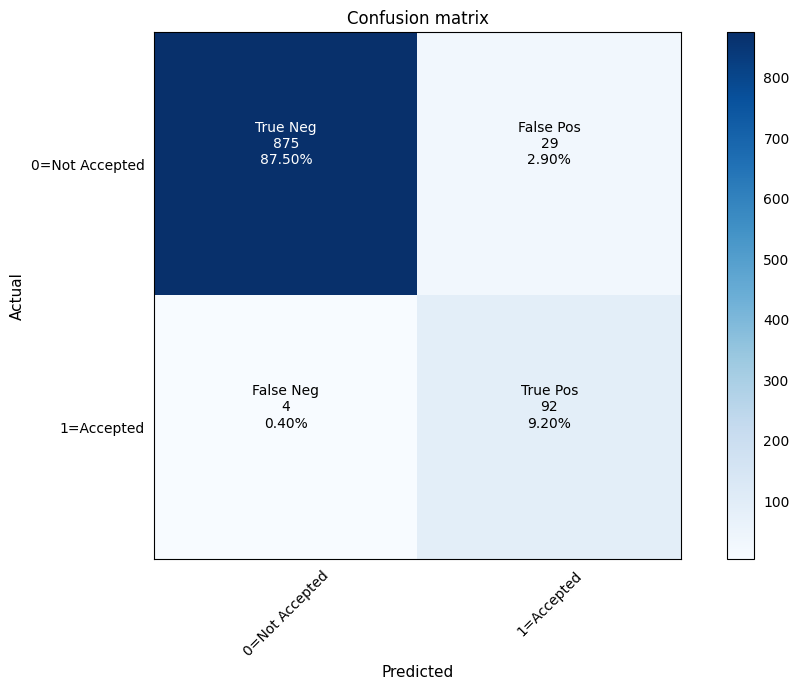

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       904
           1       0.76      0.96      0.85        96

    accuracy                           0.97      1000
   macro avg       0.88      0.96      0.91      1000
weighted avg       0.97      0.97      0.97      1000
 

Jaccard Score: 0.736
Log loss: 1.1894405618408663 



In [130]:
# create initial RF model without pruning
from sklearn.preprocessing import RobustScaler


rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=150,
    max_samples=None,
    max_features=7,
    max_depth=4,
    class_weight='balanced_subsample',
    oob_score=True
)
pipe8_3 = Pipeline([('scaler', StandardScaler()), ('clf', rf)])
acc_test_8_3, acc_train_8_3, rec_test_8_3, rec_train_8_3 = modeling(
    clf=pipe8_3,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='RF 3',
    stratify=True)

Train Accuracy: 0.978
Test Accuracy: 0.967
Train Recall: 0.9869791666666666
Test Recall: 0.9583333333333334
OOB score: 0.972


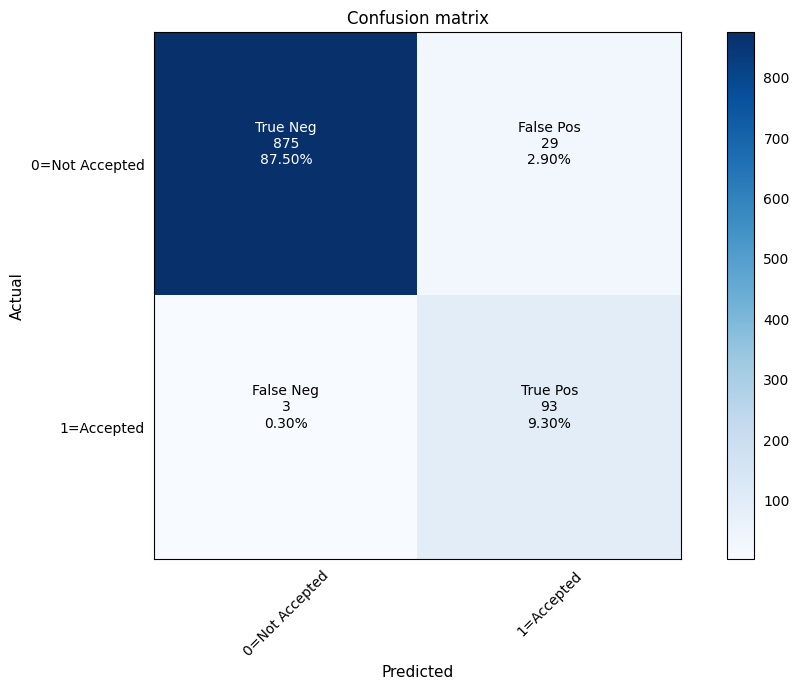

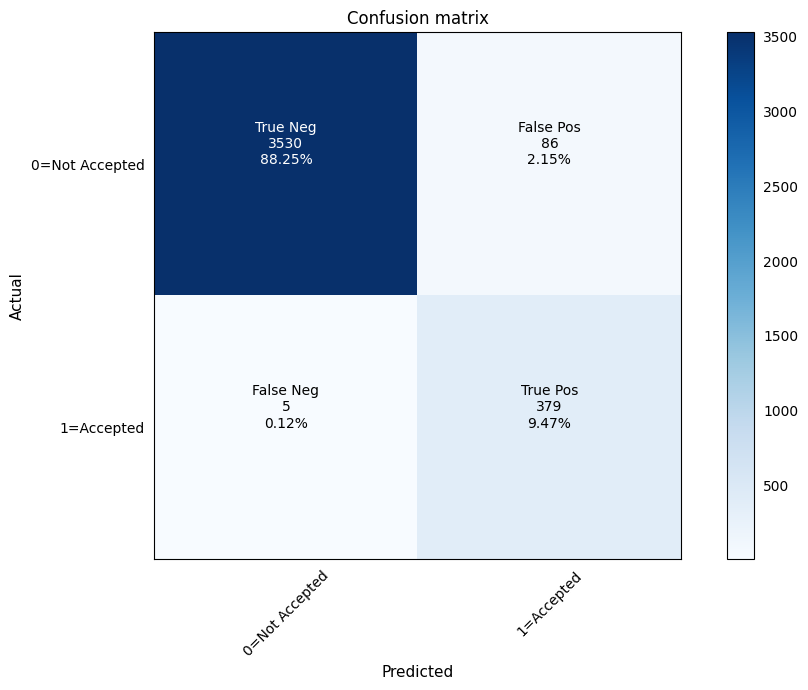

In [131]:
# print result for check overfit
print(f"Train Accuracy: {acc_train_8_3}")
print(f"Test Accuracy: {acc_test_8_3}")
print(f"Train Recall: {rec_train_8_3}")
print(f"Test Recall: {rec_test_8_3}")
print(f"OOB score: {rf.oob_score_}")

rf.fit(x_train,y_train.ravel())
y_train_predicted=rf.predict(x_train)
y_test_predicted=rf.predict(x_test)
cm = confusion_matrix(y_test, y_test_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_test, y_test_predicted))
cm = confusion_matrix(y_train, y_train_predicted)
plot_confusion_matrix2(cm=cm, classes={'Not Accepted':0, 'Accepted':1}, )
# print(classification_report(y_train, y_train_predicted))

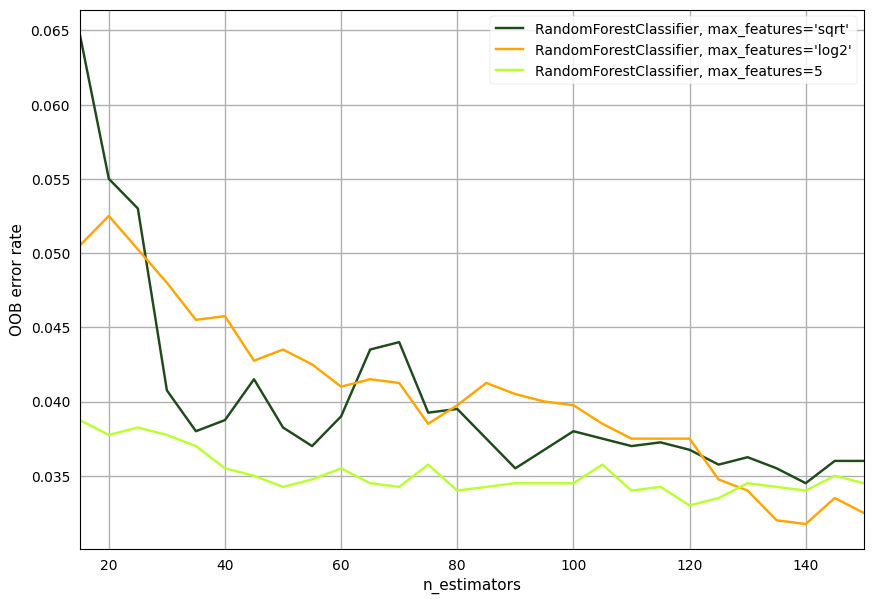

In [132]:
from typing import OrderedDict

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features='sqrt',
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features="log2",
        ),
    ),
    (
        "RandomForestClassifier, max_features=5",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            criterion='entropy',
            n_estimators=150,
            max_samples=None,
            max_depth=4,
            class_weight='balanced_subsample',
            max_features=5,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

It doesn't seem overfit, so there is no problem. Very Nice result, because only 7 of the customers who accepted the bank loan were wrongly predicted

In [133]:
# check improve model by change test_size
change_test_size(pipe8_3, x, y, 'RF')

In [134]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"Random Forest", '0.2', acc_test_8_3, rec_test_8_3]
best_model_train.loc[len(best_model_train.index)] = [f"Random Forest", '0.2', acc_train_8_3, rec_train_8_3]

# Comparing Models

In [135]:
# tabel of best models by Test_Accuracy
best_model_test.sort_values(by=['Test_Recall'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='summer_r')

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana;">
    ✅ We analyzed the Personal Loan campaign data using EDA and by using different models. Finally, according to the above table, the model made with Random Forest is the best model for the intended purpose (lower recall) by Test_Rcall=0.97, Test_Accuracy=0.96.
</div>

# Visualization Final Model

In [136]:
x_visual = df.drop('Personal Loan', axis=1)
y_visual = df['Personal Loan'].values.reshape(-1,1)

In [137]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [138]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x_visual, y_visual, test_size=0.2, random_state=0, stratify=y_visual)
pipe8_3.fit(x_train, y_train.ravel())
y_pred_test = pipe8_3.predict(x_test)
y_pred_train = pipe8_3.predict(x_train)
x_test.insert(11,'Personal Loan', y_test)
x_test.insert(12, 'Pred', y_pred_test)
x_train.insert(11,'Personal Loan', y_train)
x_train.insert(12, 'Pred', y_pred_train)
cols =['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in cols:
    fig = px.scatter_3d(
        data_frame= x_test,
        x=x_test.Income,
        y=x_test[col],
        z=x_test['Personal Loan'],
        color=y_pred_test,
        color_discrete_map={0:'red', 1:'orange'},
        template='ggplot2',
        hover_name='Age',
        # hover_data=
        opacity=0.6,
        # symbol='Transmission',
        # symbol_map=
        # log_x=True,
        # log_z=True,
        height=700,
        title=f'Visualization Performance of Model in Predicting')

    pio.show(fig)

In [139]:
fn_rows_train = x_train[(x_train['Personal Loan'] == 1) & (x_train['Pred'] == 0)]
fn_rows_test = x_test[(x_test['Personal Loan'] == 1) & (x_test['Pred'] == 0)]
fn_rows = pd.concat([fn_rows_train, fn_rows_test])
fn_rows

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
3403   54          29    6.83       3    3.7          2         0   
1518   43          17    5.33       4    3.0          3       221   
323    59          34    8.25       1    4.4          1         0   
1126   32           8    8.67       2    3.7          1         0   
1069   44          18    6.25       2    3.5          1         0   
1577   34           8    5.42       1    3.0          1       227   
1062   47          21    6.92       1    3.8          1        97   
2345   65          40    7.42       1    4.1          1       299   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  Pred  
3403                   0           0       1           0              1     0  
1518                   0           0       1           0              1     0  
323                    0           0       0           0              1     0  
1126                   0           0       0           1              1     0  
1069                   0           0       1           0              1     0  
1577                   0           0       1           0              1     0  
1062                   0           0       0           0              1     0  
2345                   0           1       1           0              1     0

#### Conclusion

Accoring to above plots and table:
 - Most of the data are predicted correctly and there are few errors

 - Our final model predicted 7 customers wrongly. On analyzing the Income , Education,Family , we can see the Income is not in range of High income group (more than $10thousand) and education is 1 (undergrad) for most of them and there CCavg is also low. These cases are some exceptions.

 - So for this bank we can have different profiles for customers.
 - **High Profile Clients:** Higher Income,Advanced/Graduate level Education, 3-4 Family members,high CCAvg
 - **Average Profile:** Medium Income,Graduate level Education, 3-4 Family members,medium CCAvg
 - **Low Profile:** Lower income,undergrads Education,3-4 Family members,low CCAvg
 - CCavg and Mortages can also be looked upon as based on EDA and this features also play some role in likelihood of buy loan.
 - We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.
 - Our 2nd target would be Medium profile customers.
 - The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.


# Prediction Sample Data

In [140]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [141]:
# fit final model on all of data (train + test)
final_model = pipe8_3
final_model.fit(x_visual, y_visual)

# define sample data
sample = pd.DataFrame({'Age':[42], 'Experience':[16], 'Income':[30/12], 'Family':[3], 'CCAvg':[1.2], 'Education':[3], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[0], 'Online':[1], 'CreditCard':[1],})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predict sample data
result = final_model.predict(sample)

print('='*38)
print(f"Predict whether the customer will accept a personal loan? (0:No & 1:Yes): {result}")

Age: 42
Experience: 16
Income: 2.5
Family: 3
CCAvg: 1.2
Education: 3
Mortgage: 0
Securities Account: 1
CD Account: 0
Online: 1
CreditCard: 1

Predict whether the customer will accept a personal loan? (0:No & 1:Yes): [0]
